# Analyzing Doctors Consultation fees across Cities

##  Importing Required Libraries for Web Scrapping

In [1]:
import pandas as pd, numpy as np

import requests, re
from bs4 import BeautifulSoup

## Extracting Data from Practo website

In [2]:
name, spec, exp, area, fee, likes, stories = [], [], [], [], [], [], []
cities = ["Bangalore", "Hyderabad", "Chennai", "Mumbai", "Pune", "Delhi", "Kolkata"]
urls = [
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dentist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22General%20Physician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ear-nose-throat%20(ent)%20Specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Homoeopath%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}",
    "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}&page={}"
]     # URLs for different specialties (dentists, gynecologists, etc.) with placeholders for city and page number

for url in urls:
    for city in cities:
        for doctors in range(1, 3):
            full_url = url.format(city, doctors)
            page = requests.get(full_url)
            soup = BeautifulSoup(page.text, 'html.parser')
            for doctor_card in soup.find_all("div", class_="u-border-general--bottom"):
                nam = doctor_card.find("h2", class_="doctor-name")
                spe = doctor_card.find("div", class_="u-grey_3-text")
                ex = doctor_card.find("div", class_="uv2-spacer--xs-top")
                are = doctor_card.find("div", class_="u-bold u-d-inlineblock u-valign--middle")
                fe = doctor_card.find("div", class_="uv2-spacer--sm-top")
                like = doctor_card.find("span", class_="o-label--success u-bold")
                storie = doctor_card.find("span", class_="u-bold u-t-underline")
#                 for nam in doctor_card:
#                     name.append(nam.text)
                name.append(nam.text if nam else np.nan)
                spec.append(spe.text if spe else np.nan)
                exp.append(ex.text if ex else np.nan)
                area.append(are.text if are else np.nan)
                fee.append(fe.text if fe else np.nan)
                likes.append(like.text if like else np.nan)
                stories.append(storie.text if storie else np.nan)

# Checking the length of each list after extraction to avoid the error while creating the DataFrame

In [3]:
print(len(name))
print(len(spec))
print(len(exp))
print(len(area))
print(len(fee))
print(len(likes))
print(len(stories))

1057
1057
1057
1057
1057
1057
1057


# Creating Data Frame

In [4]:
df = pd.DataFrame({
    "Name": name,
    "Specialization": spec,
    "Experience": exp,
    "Area": area,
    "Fee": fee,
    "Likes": likes,
    "Stories": stories
})

# Saving the retrived data into csv file

In [5]:
df.to_csv("city_doctors_data.csv", index=False)

In [6]:
df

Name                        Specialization  \
0                          NaN                                   NaN   
1                          NaN     3 Dentist23 - 31 years experience   
2           Dr. Sumanth Shetty    Dentist25 years experience overall   
3             Dr. Minty Sharma    Dentist18 years experience overall   
4               Dr. Shilpa I.G    Dentist17 years experience overall   
...                        ...                                   ...   
1052    Dr. Sabyasachi Mallick   Ayurveda34 years experience overall   
1053         Dr. Jyoti Lakhani   Ayurveda20 years experience overall   
1054             Dr. Aswathi M   Ayurveda12 years experience overall   
1055  Dr. Sandipan Chakraborty   Ayurveda24 years experience overall   
1056          Dr. Mukesh Kumar   Ayurveda17 years experience overall   

                       Experience                   Area  \
0                             NaN                    NaN   
1        23 - 31 years experience                    NaN   
2     25 years experience overall  Koramangala,Bangalore   
3     18 years experience overall   HSR Layout,Bangalore   
4     17 years experience overall  Singasandra,Bangalore   
...                           ...                    ...   
1052  34 years experience overall       MG Road ,Kolkata   
1053  20 years experience overall    Bhawanipore,Kolkata   
1054  12 years experience overall       Kalighat,Kolkata   
1055  24 years experience overall      Ultadanga,Kolkata   
1056  17 years experience overall     Ballygunge,Kolkata   

                                                    Fee  Likes  \
0                                                   NaN    NaN   
1     Sahakaranagar₹400Consultation Fees98%534 Patie...    NaN   
2     Koramangala,Bangalore  Chisel Dental₹300 Consu...   97%    
3     HSR Layout,Bangalore  Smiles Dental Studio₹350...   98%    
4     Singasandra,Bangalore  Dental 32₹300 Consultat...   98%    
...                                                 ...    ...   
1052  MG Road ,Kolkata  Pt. Banwari Lal Sharma Ayurv...  100%    
1053  Bhawanipore,Kolkata  Ayur Healing - Ayurveda &...    NaN   
1054  Kalighat,Kolkata  Ayur Kerala₹400 Consultation...    NaN   
1055  Ultadanga,Kolkata  Ayusya Ayurveda Superspecia...   59%    
1056  Ballygunge,Kolkata  Shodhanam Kerala Panchakar...    NaN   

                   Stories  
0                      NaN  
1                      NaN  
2     2705 Patient Stories  
3      256 Patient Stories  
4      199 Patient Stories  
...                    ...  
1052       1 Patient Story  
1053                   NaN  
1054                   NaN  
1055    10 Patient Stories  
1056                   NaN  

[1057 rows x 7 columns]

# Importing the Required Libraries and reading the above CSV file

In [1]:
import pandas as pd, numpy as np
import re
df1=pd.read_csv("city_doctors_data.csv")

# Dropping the Null values from First column

In [2]:
df1=df1.dropna(subset=["Name"], ignore_index = True)

# Extracting the required data using regex and storing them in new columns

In [3]:
df1["Specialization"]=df1["Specialization"].apply(lambda x: str(re.findall("Dentist|Gynecologist\/Obstetrician|General Physician|Ear-Nose-Throat \(ENT\)|Ayurveda|Dermatologist|Homoeopath",str(x))).replace('[',"").replace(']',"").replace("'",""))
df1["Experience"]=df1["Experience"].apply(lambda x: str(re.findall("\d+",str(x))).replace('[',"").replace(']',"").replace("'",""))
df1[['Area', 'City']] = df1['Area'].str.extract(r'(.+),\s*(.+)')
df1["Fee"]=df1["Fee"].apply(lambda x: str(re.findall("₹(\d+)",str(x))).replace('[',"").replace(']',"").replace("'","").replace(",","").replace(' ',""))
df1["Recommendation(%)"]=df1["Likes"].str.replace("%","")
df1["No_of_reviews"]=df1["Stories"].apply(lambda x: str(re.findall("(\d+)",str(x))).replace('[',"").replace(']',"").replace("'",""))

# Replacing emply cells with null values

In [4]:
df1["Experience"]=df1["Experience"].replace("",np.nan)
df1["Fee"]=df1["Fee"].replace("",np.nan)
df1["No_of_reviews"]=df1["No_of_reviews"].replace("",np.nan)

# Dropping the unwanted columns

In [5]:
df1.drop(["Likes","Stories"],axis=1,inplace=True)

# Dropping Null Values

In [6]:
df1.dropna(inplace=True, ignore_index = True)

# checking whether any empty cells are present in our data

In [7]:
df1['Specialization'].value_counts()

Specialization
Dentist                      140
Dermatologist                137
Homoeopath                   125
Ear-Nose-Throat (ENT)        124
Gynecologist/Obstetrician    121
Ayurveda                     108
General Physician             96
                               2
Name: count, dtype: int64

# Two empty values found in specialization column finding the row index

In [8]:
df1[df1['Specialization'] == '']

Name Specialization Experience           Area   Fee  \
522    Dr. K R Meghanadh                        39  Jubilee Hills  1200   
527  Dr. Padma Keerthi K                         4     Madinaguda   500   

          City Recommendation(%) No_of_reviews  
522  Hyderabad               73             27  
527  Hyderabad              100              2

# Dropping empty index rows

In [9]:
df1 = df1.drop([522, 527]).reset_index(drop=True)

# Converting the Data Types

In [10]:
df1["No_of_reviews"]=df1["No_of_reviews"].astype(int)
df1["Recommendation(%)"]=df1["Recommendation(%)"].astype(int)
df1["Fee"]=df1["Fee"].astype(int)
df1["Experience"]=df1["Experience"].astype(int)

# Cleaned Data Set

In [66]:
df1

Name Specialization  Experience         Area  Fee  \
0          Dr. Sumanth Shetty        Dentist          25  Koramangala  300   
1            Dr. Minty Sharma        Dentist          18   HSR Layout  350   
2              Dr. Shilpa I.G        Dentist          17  Singasandra  300   
3           Dr. Rashmi Shetty        Dentist          19  Koramangala  350   
4            Dr. Priya Bansal        Dentist          18  Koramangala  500   
..                        ...            ...         ...          ...  ...   
846     Dr. Siddhartha Sharma       Ayurveda          17    Salt Lake  300   
847       Dr. Samarjit Ghatak       Ayurveda          19    Bansdroni  400   
848             Dr. Arnab Ray       Ayurveda          23     New Town  800   
849    Dr. Sabyasachi Mallick       Ayurveda          34     MG Road   300   
850  Dr. Sandipan Chakraborty       Ayurveda          24    Ultadanga  500   

          City  Recommendation(%)  No_of_reviews  
0    Bangalore                 97           2705  
1    Bangalore                 98            256  
2    Bangalore                 98            199  
3    Bangalore                 99           2767  
4    Bangalore                 99            200  
..         ...                ...            ...  
846    Kolkata                100              6  
847    Kolkata                100              1  
848    Kolkata                 83              3  
849    Kolkata                100              1  
850    Kolkata                 59             10  

[851 rows x 8 columns]

# Saving the cleaned data into csv file

In [12]:
df1.to_csv("Cleaned_Doctors.csv", index=False)

# Importing required libraries for data visualization and Analysis

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df1=pd.read_csv("Cleaned_Doctors.csv")

In [2]:
df1

Name Specialization  Experience         Area  Fee  \
0          Dr. Sumanth Shetty        Dentist          25  Koramangala  300   
1            Dr. Minty Sharma        Dentist          18   HSR Layout  350   
2              Dr. Shilpa I.G        Dentist          17  Singasandra  300   
3           Dr. Rashmi Shetty        Dentist          19  Koramangala  350   
4            Dr. Priya Bansal        Dentist          18  Koramangala  500   
..                        ...            ...         ...          ...  ...   
846     Dr. Siddhartha Sharma       Ayurveda          17    Salt Lake  300   
847       Dr. Samarjit Ghatak       Ayurveda          19    Bansdroni  400   
848             Dr. Arnab Ray       Ayurveda          23     New Town  800   
849    Dr. Sabyasachi Mallick       Ayurveda          34     MG Road   300   
850  Dr. Sandipan Chakraborty       Ayurveda          24    Ultadanga  500   

          City  Recommendation(%)  No_of_reviews  
0    Bangalore                 97           2705  
1    Bangalore                 98            256  
2    Bangalore                 98            199  
3    Bangalore                 99           2767  
4    Bangalore                 99            200  
..         ...                ...            ...  
846    Kolkata                100              6  
847    Kolkata                100              1  
848    Kolkata                 83              3  
849    Kolkata                100              1  
850    Kolkata                 59             10  

[851 rows x 8 columns]

In [3]:
styled_df1 = df1.style.background_gradient(cmap='YlGnBu')
styled_df1

In [4]:
sorted_df_by_fee_descending = df1.sort_values(by='Fee', ascending=False)

print("Sorted DataFrame based only on Fee (descending order):")
sorted_df_by_fee_descending.style.background_gradient(cmap = 'YlGnBu')

Sorted DataFrame based only on Fee (descending order):


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               851 non-null    object
 1   Specialization     851 non-null    object
 2   Experience         851 non-null    int64 
 3   Area               851 non-null    object
 4   Fee                851 non-null    int64 
 5   City               851 non-null    object
 6   Recommendation(%)  851 non-null    int64 
 7   No_of_reviews      851 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 53.3+ KB


In [6]:
df1.describe(include = "object").T

count unique                top freq
Name             851    843  Dr. Swati Kapadia    2
Specialization   851      7            Dentist  140
Area             851    334       Andheri West   22
City             851      7              Delhi  133

In [7]:
df1.describe().T

count        mean         std   min    25%    50%    75%  \
Experience         851.0   22.293772    9.625246   2.0   15.0   21.0   27.0   
Fee                851.0  717.205640  403.446381  49.0  500.0  600.0  800.0   
Recommendation(%)  851.0   94.146886    9.001480  25.0   93.0   97.0   99.0   
No_of_reviews      851.0  126.851939  219.539055   1.0   15.0   55.0  156.0   

                      max  
Experience           60.0  
Fee                5000.0  
Recommendation(%)   100.0  
No_of_reviews      2767.0

In [8]:
specialization_distribution = df1['Specialization'].value_counts()
specialization_distribution

Specialization
Dentist                      140
Dermatologist                137
Homoeopath                   125
Ear-Nose-Throat (ENT)        124
Gynecologist/Obstetrician    121
Ayurveda                     108
General Physician             96
Name: count, dtype: int64

In [9]:
location_distribution = df1['City'].value_counts()
location_distribution

City
Delhi        133
Pune         131
Mumbai       129
Bangalore    128
Chennai      116
Hyderabad    114
Kolkata      100
Name: count, dtype: int64

In [10]:
fee_distribution = {
    'Top 5 Highest Fees': df1.nlargest(5, 'Fee')['Fee'].tolist(),
    'Top 5 Lowest Fees': df1.nsmallest(5, 'Fee')['Fee'].tolist()
}

fee_distribution

{'Top 5 Highest Fees': [5000, 3000, 2500, 2500, 2200],
 'Top 5 Lowest Fees': [49, 50, 50, 50, 51]}

In [11]:
# 4. Recommendation Analysis
doctor_with_highest_recommendation = df1.loc[df1['Recommendation(%)'].idxmax()]
doctor_with_highest_recommendation

Name                 Dr. Sainath N.K.
Specialization                Dentist
Experience                         23
Area                    Sarjapur Road
Fee                               500
City                        Bangalore
Recommendation(%)                 100
No_of_reviews                     172
Name: 6, dtype: object

In [12]:
# 5. Experience Analysis
doctor_with_most_experience = df1.loc[df1['Experience'].idxmax()]
doctor_with_most_experience

Name                    Dr. Shakti Bhan Khanna
Specialization       Gynecologist/Obstetrician
Experience                                  60
Area                              Chirag Delhi
Fee                                       2000
City                                     Delhi
Recommendation(%)                           89
No_of_reviews                                4
Name: 240, dtype: object

In [13]:
# 6. Review Analysis
doctor_with_most_reviews = df1.loc[df1['No_of_reviews'].idxmax()]
doctor_with_most_reviews

Name                 Dr. Rashmi Shetty
Specialization                 Dentist
Experience                          19
Area                       Koramangala
Fee                                350
City                         Bangalore
Recommendation(%)                   99
No_of_reviews                     2767
Name: 3, dtype: object

In [14]:
def h_max(s):
    is_max = s == s.max()
    return ['color: darkblue' if cell else '' for cell in is_max]

In [15]:
def h_min(s):
    is_min = s == s.min()
    return ['color: red' if cell else '' for cell in is_min]

In [16]:
average_fee_by_Specialization = df1.groupby('Specialization')['Fee'].mean().reset_index()
average_fee_by_Specialization

Specialization         Fee
0                   Ayurveda  583.287037
1                    Dentist  445.857143
2              Dermatologist  797.445255
3      Ear-Nose-Throat (ENT)  891.129032
4          General Physician  832.541667
5  Gynecologist/Obstetrician  830.578512
6                 Homoeopath  678.024000

In [17]:
average_fee_by_city = df1.groupby('City')['Fee'].mean().reset_index()
average_fee_by_city

City          Fee
0  Bangalore   607.609375
1    Chennai   609.051724
2      Delhi   878.406015
3  Hyderabad   518.842105
4    Kolkata   695.990000
5     Mumbai  1098.821705
6       Pune   569.427481

In [18]:
average_experience_by_city = df1.groupby('City')['Experience'].mean().reset_index()
average_experience_by_city

City  Experience
0  Bangalore   22.929688
1    Chennai   22.413793
2      Delhi   24.578947
3  Hyderabad   20.807018
4    Kolkata   19.520000
5     Mumbai   24.116279
6       Pune   20.862595

In [19]:
fee_distribution_across_cities = df1.groupby('City')['Fee'].describe()
fee_distribution_across_cities.style.apply(h_max).apply(h_min)

In [20]:
experience_distribution_across_cities = df1.groupby('City')['Experience'].describe()
experience_distribution_across_cities.style.apply(h_max).apply(h_min)

### Total Number of Doctors by City and Specialization:

In [21]:
crosstab_df = pd.crosstab(df1['City'], df1['Specialization'])

crosstab_df.style.apply(h_max).apply(h_min)

## Average Consultation Fee by City and Specialization:

In [22]:
pivot_table_1 = pd.pivot_table(df1, values='Fee', index='City', columns='Specialization', aggfunc='mean')
print("Average Consultation Fee by City and Specialization:")
pivot_table_1.style.highlight_min(color = "lightblue", axis = 0)

Average Consultation Fee by City and Specialization:


In [23]:
# City, Specialization, and Fee
city_specialization_fee_mean = df1.groupby(['City', 'Specialization'])['Fee'].mean()
print("Mean fee by city and specialization:")
city_specialization_fee_mean

Mean fee by city and specialization:


City       Specialization           
Bangalore  Ayurveda                      495.000000
           Dentist                       415.000000
           Dermatologist                 712.500000
           Ear-Nose-Throat (ENT)         744.444444
           General Physician             706.250000
           Gynecologist/Obstetrician     697.222222
           Homoeopath                    544.950000
Chennai    Ayurveda                      563.636364
           Dentist                       307.500000
           Dermatologist                 680.000000
           Ear-Nose-Throat (ENT)         831.250000
           General Physician             800.000000
           Gynecologist/Obstetrician     661.111111
           Homoeopath                    505.555556
Delhi      Ayurveda                      641.611111
           Dentist                       477.500000
           Dermatologist                 975.000000
           Ear-Nose-Throat (ENT)        1147.500000
           General Physicia

In [24]:
# City, Specialization, and Experience
city_specialization_experience_mean = df1.groupby(['City', 'Specialization'])['Experience'].mean()
print("Mean experience by city and specialization:")
city_specialization_experience_mean

Mean experience by city and specialization:


City       Specialization           
Bangalore  Ayurveda                     19.200000
           Dentist                      21.250000
           Dermatologist                17.650000
           Ear-Nose-Throat (ENT)        25.222222
           General Physician            35.166667
           Gynecologist/Obstetrician    24.944444
           Homoeopath                   22.400000
Chennai    Ayurveda                     21.727273
           Dentist                      18.650000
           Dermatologist                19.050000
           Ear-Nose-Throat (ENT)        27.125000
           General Physician            29.000000
           Gynecologist/Obstetrician    26.555556
           Homoeopath                   17.666667
Delhi      Ayurveda                     24.388889
           Dentist                      19.750000
           Dermatologist                18.550000
           Ear-Nose-Throat (ENT)        26.600000
           General Physician            27.687500
           Gy

### Maximum Experience by City and Specialization:

In [25]:
pivot_table_2 = pd.pivot_table(df1, values='Experience', index='City', columns='Specialization', aggfunc='max')
print("Maximum Experience by City and Specialization:")
pivot_table_2.style.apply(h_max).apply(h_min)

Maximum Experience by City and Specialization:


In [26]:
# Top 5 Highest Fees with Specialization and City
top_5_highest_fees = df1.nlargest(5, 'Fee')[['Name', 'Specialization', 'City', 'Fee']]
top_5_highest_fees

Name             Specialization    City   Fee
676                  Dr. Rajesh Shah                 Homoeopath  Mumbai  5000
584  Dr. (Major) Rajesh Kr. Bhardwaj      Ear-Nose-Throat (ENT)   Delhi  3000
67                 Dr. Rajesh Shetty                    Dentist  Mumbai  2500
685            Dr. Subhash K Dhawale                 Homoeopath  Mumbai  2500
194                   Dr. Swati Shah  Gynecologist/Obstetrician  Mumbai  2200

In [27]:
# Top 5 Lowest Fees with Specialization and City
top_5_lowest_fees = df1.nsmallest(5, 'Fee')[['Name', 'Specialization', 'City', 'Fee']]
top_5_lowest_fees

Name Specialization       City  Fee
766  Dr. Achattil Asha       Ayurveda  Hyderabad   49
819    Dr. Mahesh Shah       Ayurveda      Delhi   50
822    Dr. Vijay Abbot       Ayurveda      Delhi   50
827    Dr. Vipin Kumar       Ayurveda      Delhi   50
638     Dr. Chetan Raj     Homoeopath  Hyderabad   51

In [28]:
# Top 5 Doctors with the Max fee by Specialization and City
top_5_min_fee_specialization_City = df1.groupby(['Specialization', 'City']).apply(lambda x: x.nsmallest(5, 'Fee')).reset_index(drop=True)[['Specialization', 'City', 'Name', 'Fee']]

print("Top 5 Doctors with the Max fee by Specialization and City:")
top_5_min_fee_specialization_City

Top 5 Doctors with the Max fee by Specialization and City:


Specialization       City                         Name  Fee
0         Ayurveda  Bangalore                    Dr. Vinay  300
1         Ayurveda  Bangalore       Dr. Maitry H Shettigar  300
2         Ayurveda  Bangalore             Dr. Deepashree.R  350
3         Ayurveda  Bangalore                  Dr. Tanmaya  400
4         Ayurveda  Bangalore                 Dr. Alok Roy  400
..             ...        ...                          ...  ...
240     Homoeopath       Pune         Dr. Vaseem Choudhary  300
241     Homoeopath       Pune         Dr. Kshitija Bhujbal  300
242     Homoeopath       Pune         Dr. Rashmi Narnawale  300
243     Homoeopath       Pune  Dr. Surbhi Gupta Khandelwal  350
244     Homoeopath       Pune             Dr. Priya Gautam  375

[245 rows x 4 columns]

In [29]:
# Define a function to get top 5 doctors based on given criteria for a specific specialization

def get_top_doctors_by_specialization_and_city(df, city, specialization, criteria):
    filtered_df = df1[(df1['City'] == city) & (df1['Specialization'] == specialization)]
    if criteria == 'min_fee':
        top_doctors = filtered_df.nsmallest(5, 'Fee')
    elif criteria == 'max_reviews':
        top_doctors = filtered_df.nlargest(5, 'No_of_reviews')
    elif criteria == 'max_recommendations':
        top_doctors = filtered_df.nlargest(5, 'Recommendation(%)')
    return top_doctors

# Specify the city, specialization, and criteria
city = 'Hyderabad'
specialization = 'Dentist'  # Specify the specialization
criteria = 'min_fee'  # Change this to 'max_reviews' or 'max_recommendations' as needed

# Get top 5 doctors for the specified specialization in the specified city and criteria
top_doctors = get_top_doctors_by_specialization_and_city(df1, city, specialization, criteria)

# Display the details of top 5 doctors for the specified specialization
print(f"Top 5 {specialization}s in {city} with {criteria}:")
top_doctors

Top 5 Dentists in Hyderabad with min_fee:


Name Specialization  Experience           Area  Fee  \
24       Dr. N Srinivas        Dentist          22       LB Nagar  200   
26     Dr. Bharat Reddy        Dentist          26      Borabanda  250   
23  Dr. K Sravani Reddy        Dentist          13       Karkhana  300   
29    Dr. Siva Srinivas        Dentist          20     Malkajgiri  300   
31   Dr. Saritha Kolanu        Dentist          23  Banjara Hills  300   

         City  Recommendation(%)  No_of_reviews  
24  Hyderabad                 98           1210  
26  Hyderabad                 98            488  
23  Hyderabad                 98             75  
29  Hyderabad                 94             43  
31  Hyderabad                100             76

In [30]:
# Top 5 Doctors with the Most Reviews by Specialization and City
top_5_most_reviews_specialization_City = df1.groupby(['Specialization', 'City']).apply(lambda x: x.nlargest(5, 'No_of_reviews')).reset_index(drop=True)[['Specialization', 'City', 'Name', 'No_of_reviews']]

print("Top 5 Doctors with the Most Reviews by Specialization and City:")
top_5_most_reviews_specialization_City

Top 5 Doctors with the Most Reviews by Specialization and City:


Specialization       City                            Name  No_of_reviews
0         Ayurveda  Bangalore  Dr. Shambulingaiah S. Hiremath            616
1         Ayurveda  Bangalore             Dr. Sharad Kulkarni            524
2         Ayurveda  Bangalore               Dr. Krishna Kumar            498
3         Ayurveda  Bangalore                     Dr. Deepika            321
4         Ayurveda  Bangalore               Dr. Phanindra V V            279
..             ...        ...                             ...            ...
240     Homoeopath       Pune            Dr. Vaseem Choudhary            286
241     Homoeopath       Pune              Dr. Kavita Bhapkar            111
242     Homoeopath       Pune                Dr. Nidhi Pandya            107
243     Homoeopath       Pune                Dr. Priya Gautam            107
244     Homoeopath       Pune     Dr. Surbhi Gupta Khandelwal             79

[245 rows x 4 columns]

In [31]:
# Top 5 Doctors with the Most Recomendations by Specialization and City
top_5_most_recommendations_specialization_City = df1.groupby(['Specialization', 'City']).apply(lambda x: x.nlargest(5, 'Recommendation(%)')).reset_index(drop=True)[['Specialization', 'City', 'Name', 'Recommendation(%)']]

print("Top 5 Doctors with the Most Recomendations by Specialization and City:")
top_5_most_recommendations_specialization_City

Top 5 Doctors with the Most Recomendations by Specialization and City:


Specialization       City                        Name  Recommendation(%)
0         Ayurveda  Bangalore          Dr. Geetika Thakur                100
1         Ayurveda  Bangalore            Dr. Deepashree.R                100
2         Ayurveda  Bangalore      Dr. Maitry H Shettigar                100
3         Ayurveda  Bangalore         Dr. Lakshmi Narayan                100
4         Ayurveda  Bangalore              Dr. Pepsy Jose                100
..             ...        ...                         ...                ...
240     Homoeopath       Pune           Dr. Manish Jawale                100
241     Homoeopath       Pune            Dr. Shama Nadaph                100
242     Homoeopath       Pune            Dr. Priya Gautam                100
243     Homoeopath       Pune  Dr. Vaishali Sachin Dudhal                100
244     Homoeopath       Pune             Dr. Yogita Kale                100

[245 rows x 4 columns]

In [32]:
# Filter the DataFrame for a specific city and specialization
hyderabad_dentist_top_doctors = top_5_most_recommendations_specialization_City[(top_5_most_recommendations_specialization_City['City'] == 'Hyderabad') & (top_5_most_recommendations_specialization_City['Specialization'] == 'Dentist')]

print("Top 5 Dentists with the Most Recommendations in Hyderabad:")
hyderabad_dentist_top_doctors

Top 5 Dentists with the Most Recommendations in Hyderabad:


Specialization       City                    Name  Recommendation(%)
50        Dentist  Hyderabad      Dr. Saritha Kolanu                100
51        Dentist  Hyderabad  Dr. Anitha Ethamukkala                100
52        Dentist  Hyderabad      Dr. Kishore. M.S.V                100
53        Dentist  Hyderabad      Dr. Mohan Rayapudi                100
54        Dentist  Hyderabad         Dr. Sana Fatima                100

In [33]:
# Filter the DataFrame for a specific city
hyderabad_top_doctors = top_5_most_recommendations_specialization_City[top_5_most_recommendations_specialization_City['City'] == 'Hyderabad']

print("Top 5 Doctors with the Most Recommendations in Hyderabad by Specialization:")
hyderabad_top_doctors

Top 5 Doctors with the Most Recommendations in Hyderabad by Specialization:


Specialization       City  \
15                    Ayurveda  Hyderabad   
16                    Ayurveda  Hyderabad   
17                    Ayurveda  Hyderabad   
18                    Ayurveda  Hyderabad   
19                    Ayurveda  Hyderabad   
50                     Dentist  Hyderabad   
51                     Dentist  Hyderabad   
52                     Dentist  Hyderabad   
53                     Dentist  Hyderabad   
54                     Dentist  Hyderabad   
85               Dermatologist  Hyderabad   
86               Dermatologist  Hyderabad   
87               Dermatologist  Hyderabad   
88               Dermatologist  Hyderabad   
89               Dermatologist  Hyderabad   
120      Ear-Nose-Throat (ENT)  Hyderabad   
121      Ear-Nose-Throat (ENT)  Hyderabad   
122      Ear-Nose-Throat (ENT)  Hyderabad   
123      Ear-Nose-Throat (ENT)  Hyderabad   
124      Ear-Nose-Throat (ENT)  Hyderabad   
155          General Physician  Hyderabad   
156          General Physician  Hyderabad   
157          General Physician  Hyderabad   
158          General Physician  Hyderabad   
159          General Physician  Hyderabad   
190  Gynecologist/Obstetrician  Hyderabad   
191  Gynecologist/Obstetrician  Hyderabad   
192  Gynecologist/Obstetrician  Hyderabad   
193  Gynecologist/Obstetrician  Hyderabad   
194  Gynecologist/Obstetrician  Hyderabad   
225                 Homoeopath  Hyderabad   
226                 Homoeopath  Hyderabad   
227                 Homoeopath  Hyderabad   
228                 Homoeopath  Hyderabad   
229                 Homoeopath  Hyderabad   

                                     Name  Recommendation(%)  
15                          Dr. C Narmada                100  
16                      Dr. Achattil Asha                100  
17                        Dr. Deepak Gaur                100  
18                       Dr. Priti Thakre                100  
19                      Dr. S Sarangapani                 99  
50                     Dr. Saritha Kolanu                100  
51                 Dr. Anitha Ethamukkala                100  
52                     Dr. Kishore. M.S.V                100  
53                     Dr. Mohan Rayapudi                100  
54                        Dr. Sana Fatima                100  
85                       Dr. Nishant Jain                100  
86                              Dr. Kamal                 99  
87                      Dr. Mounika Ketha                 99  
88                            Dr. Meghana                 99  
89                    Dr. T N Rekha Singh                 99  
120                Dr. Dushyanth Ganesuni                100  
121                    Dr. M.Naveen Kumar                100  
122                        Dr. Neha padia                100  
123                    Dr. Sampurna Ghosh                 97  
124                         Dr. S Neelima                 97  
155           Dr. Naveen Kumar Pothireddy                100  
156                    Dr. Sivani Payneni                100  
157                        Dr. Sonal Jain                100  
158               Dr. Spandana Kanaparthi                100  
159                  Dr. Anirudha Anumula                 95  
190                      Dr. J.Rajeshwari                100  
191                       Dr. R.Meenakshi                100  
192                          Dr. P Tanuja                 98  
193                   Dr. Narmada Katakam                 97  
194             Dr. Radhika Reddy Pingili                 97  
225  Dr. Panchagnula Satyanarayana Murthy                100  
226                     Dr. Venkataramana                100  
227               Dr. Shyam Kumar Longoju                100  
228                           Dr. Neeraja                100  
229                          Dr. Lokeswar                100

In [34]:
# Define a function to get top 5 doctors based on given criteria
def get_top_doctors(city, criteria):
    filtered_df = df1[df1['City'] == city]
    if criteria == 'min_fee':
        top_doctors = filtered_df.nsmallest(5, 'Fee')
    elif criteria == 'max_reviews':
        top_doctors = filtered_df.nlargest(5, 'No_of_reviews')
    elif criteria == 'max_recommendations':
        top_doctors = filtered_df.nlargest(5, 'Recommendation(%)')
    return top_doctors

# Specify the city and criteria
city = 'Hyderabad'
criteria = 'min_fee'  # Change this to 'max_reviews' or 'max_recommendations' as needed

# Get top 5 doctors for the specified city and criteria
top_doctors = get_top_doctors(city, criteria)

# Display the details of top 5 doctors
print(f"Top 5 Doctors in {city} with {criteria}:")
top_doctors

Top 5 Doctors in Hyderabad with min_fee:


Name Specialization  Experience           Area  Fee  \
766  Dr. Achattil Asha       Ayurveda          14  Himayat Nagar   49   
638     Dr. Chetan Raj     Homoeopath          13       Begumpet   51   
767    Dr. Deepak Gaur       Ayurveda          14  Himayat Nagar   99   
24      Dr. N Srinivas        Dentist          22       LB Nagar  200   
26    Dr. Bharat Reddy        Dentist          26      Borabanda  250   

          City  Recommendation(%)  No_of_reviews  
766  Hyderabad                100             10  
638  Hyderabad                 97            319  
767  Hyderabad                100              9  
24   Hyderabad                 98           1210  
26   Hyderabad                 98            488

In [35]:
# Define a function to get top 5 doctors based on given criteria for each specialization
def get_top_doctors_by_specialization(city, criteria):
    top_doctors_list = []
    for specialization in df1['Specialization'].unique():
        filtered_df = df1[(df1['City'] == city) & (df1['Specialization'] == specialization)]
        if criteria == 'min_fee':
            top_doctors = filtered_df.nsmallest(5, 'Fee')
        elif criteria == 'max_reviews':
            top_doctors = filtered_df.nlargest(5, 'No_of_reviews')
        elif criteria == 'max_recommendations':
            top_doctors = filtered_df.nlargest(5, 'Recommendation(%)')
        top_doctors_list.append(top_doctors)
    return pd.concat(top_doctors_list)

# Specify the city and criteria
city = 'Hyderabad'
criteria = 'min_fee'  # Change this to 'max_reviews' or 'max_recommendations' as needed

# Get top 5 doctors for each specialization in the specified city and criteria
top_doctors_by_specialization = get_top_doctors_by_specialization(city, criteria)

# Display the details of top 5 doctors for each specialization
print(f"Top 5 Doctors in {city} with {criteria} for each specialization:")
top_doctors_by_specialization

Top 5 Doctors in Hyderabad with min_fee for each specialization:


Name             Specialization  \
24                         Dr. N Srinivas                    Dentist   
26                       Dr. Bharat Reddy                    Dentist   
23                    Dr. K Sravani Reddy                    Dentist   
29                      Dr. Siva Srinivas                    Dentist   
31                     Dr. Saritha Kolanu                    Dentist   
173                        Dr. G Jayanthi  Gynecologist/Obstetrician   
163                      Dr. J.Rajeshwari  Gynecologist/Obstetrician   
166                      Dr. Puja Lavania  Gynecologist/Obstetrician   
165                      Dr. Swathi Reddy  Gynecologist/Obstetrician   
169                    Dr. N. Sarada Vani  Gynecologist/Obstetrician   
280             Dr. Rahul Gandhi Godisela          General Physician   
275                   Dr. Mithil B Ghushe          General Physician   
277                Dr. Lakshmikanth Reddy          General Physician   
279           Dr. Naveen Kumar Pothireddy          General Physician   
283               Dr. Spandana Kanaparthi          General Physician   
385            Dr. Ch Vijay Bhasker Reddy              Dermatologist   
386                       Dr. Mallikarjun              Dermatologist   
377                        Dr. G L Sitara              Dermatologist   
383                 Dr. Brahmananda Reddy              Dermatologist   
388                       Dr. Venu Kumari              Dermatologist   
512                          Dr. K P Goud      Ear-Nose-Throat (ENT)   
521                         Dr. S Neelima      Ear-Nose-Throat (ENT)   
524                  Dr. P.Ramakrishnaiah      Ear-Nose-Throat (ENT)   
525                   Dr. Sathish Kumar S      Ear-Nose-Throat (ENT)   
526                        Dr. Neha padia      Ear-Nose-Throat (ENT)   
638                        Dr. Chetan Raj                 Homoeopath   
641                       Dr. M R Madhavi                 Homoeopath   
642  Dr. Panchagnula Satyanarayana Murthy                 Homoeopath   
644                   Dr. B.Suresh Buddha                 Homoeopath   
646                     Dr. Venkataramana                 Homoeopath   
766                     Dr. Achattil Asha                   Ayurveda   
767                       Dr. Deepak Gaur                   Ayurveda   
763                      Dr. M. Narasimha                   Ayurveda   
764                     Dr. S Sarangapani                   Ayurveda   
765                         Dr. C Narmada                   Ayurveda   

     Experience             Area  Fee       City  Recommendation(%)  \
24           22         LB Nagar  200  Hyderabad                 98   
26           26        Borabanda  250  Hyderabad                 98   
23           13         Karkhana  300  Hyderabad                 98   
29           20       Malkajgiri  300  Hyderabad                 94   
31           23    Banjara Hills  300  Hyderabad                100   
173          16  Vanasthalipuram  350  Hyderabad                 89   
163          39             KPHB  400  Hyderabad                100   
166          18     Chanda Nagar  400  Hyderabad                 95   
165          16       Gachibowli  500  Hyderabad                 89   
169          25         Ameerpet  500  Hyderabad                 95   
280          20          Attapur  350  Hyderabad                 92   
275          21      Hitech City  500  Hyderabad                 93   
277          18      Hitech City  500  Hyderabad                 79   
279          15      Hitech City  500  Hyderabad                100   
283           8     Sanath Nagar  500  Hyderabad                100   
385          14         LB Nagar  300  Hyderabad                 96   
386          11     Chanda Nagar  400  Hyderabad                 99   
377          14       Madinaguda  500  Hyderabad                 98   
383          11    Banjara Hills  500  Hyderabad                 94   
388          19     Chan

In [36]:
# Specify the specialization and city
specialization = 'Dentist'
city = 'Hyderabad'

# Filter the DataFrame for the specific specialization and city
filtered_df = df1[(df1['Specialization'] == specialization) & (df1['City'] == city)]

# Find the doctor with the minimum fee for the specified specialization and city
min_fee_doctor = filtered_df.nsmallest(5, 'Fee')

# Find the doctor with the maximum number of recommendations for the specified specialization and city
max_recommendations_doctor = filtered_df.nlargest(5, 'Recommendation(%)')

# Concatenate the two DataFrames into one
result_df = pd.concat([min_fee_doctor, max_recommendations_doctor])

# Print the details of the doctors
print(f"Doctor with the Minimum Fee and Doctor with the Maximum Number of Recommendations for {specialization} in {city}:")
result_df

Doctor with the Minimum Fee and Doctor with the Maximum Number of Recommendations for Dentist in Hyderabad:


Name Specialization  Experience           Area  Fee  \
24          Dr. N Srinivas        Dentist          22       LB Nagar  200   
26        Dr. Bharat Reddy        Dentist          26      Borabanda  250   
23     Dr. K Sravani Reddy        Dentist          13       Karkhana  300   
29       Dr. Siva Srinivas        Dentist          20     Malkajgiri  300   
31      Dr. Saritha Kolanu        Dentist          23  Banjara Hills  300   
31      Dr. Saritha Kolanu        Dentist          23  Banjara Hills  300   
33  Dr. Anitha Ethamukkala        Dentist          23  Banjara Hills  500   
34      Dr. Kishore. M.S.V        Dentist          23     Madinaguda  500   
38      Dr. Mohan Rayapudi        Dentist          14     Kukatpally  300   
39         Dr. Sana Fatima        Dentist           8     Tolichowki  300   

         City  Recommendation(%)  No_of_reviews  
24  Hyderabad                 98           1210  
26  Hyderabad                 98            488  
23  Hyderabad                 98             75  
29  Hyderabad                 94             43  
31  Hyderabad                100             76  
31  Hyderabad                100             76  
33  Hyderabad                100             31  
34  Hyderabad                100             58  
38  Hyderabad                100             55  
39  Hyderabad                100              2

In [37]:
# Specify the specialization and city
specialization = 'Dentist'
city = 'Hyderabad'

# Filter the DataFrame for the specific specialization and city
filtered_df = df1[(df1['Specialization'] == specialization) & (df1['City'] == city)]

# Find the doctor with the minimum fee for the specified specialization and city
min_fee_doctor = filtered_df.nsmallest(5, 'Fee')

# Find the doctor with the maximum number of reviews for the specified specialization and city
max_reviews_doctor = filtered_df.nlargest(5, 'No_of_reviews')

# Concatenate the two DataFrames into one
result_df = pd.concat([min_fee_doctor, max_reviews_doctor])

# Print the details of the doctors
print(f"Doctor with the Minimum Fee and Doctor with the Maximum Number of Reviews for {specialization} in {city}:")
result_df

Doctor with the Minimum Fee and Doctor with the Maximum Number of Reviews for Dentist in Hyderabad:


Name Specialization  Experience           Area  Fee  \
24             Dr. N Srinivas        Dentist          22       LB Nagar  200   
26           Dr. Bharat Reddy        Dentist          26      Borabanda  250   
23        Dr. K Sravani Reddy        Dentist          13       Karkhana  300   
29          Dr. Siva Srinivas        Dentist          20     Malkajgiri  300   
31         Dr. Saritha Kolanu        Dentist          23  Banjara Hills  300   
24             Dr. N Srinivas        Dentist          22       LB Nagar  200   
26           Dr. Bharat Reddy        Dentist          26      Borabanda  250   
27     Dr. M. S. Sushma Susik        Dentist          33    Mehdipatnam  500   
25  Dr. Surendra Kumar Alluri        Dentist          29        Kokapet  500   
22    Dr. Adusumilli Gopinath        Dentist          25     Gachibowli  500   

         City  Recommendation(%)  No_of_reviews  
24  Hyderabad                 98           1210  
26  Hyderabad                 98            488  
23  Hyderabad                 98             75  
29  Hyderabad                 94             43  
31  Hyderabad                100             76  
24  Hyderabad                 98           1210  
26  Hyderabad                 98            488  
27  Hyderabad                 98            436  
25  Hyderabad                 99            408  
22  Hyderabad                 97            376

In [38]:
# Correlation between Fee, Experience, and Recommendation Percentage
correlation_matrix = df1[['Fee', 'Experience', 'Recommendation(%)']].corr()
print("Correlation matrix:")
correlation_matrix

Correlation matrix:


Fee  Experience  Recommendation(%)
Fee                1.000000    0.285276          -0.131234
Experience         0.285276    1.000000          -0.207912
Recommendation(%) -0.131234   -0.207912           1.000000

Correlation Matrix:

The correlation matrix shows the correlation coefficients between numerical variables. For example:

There is a weak positive correlation (0.285) between experience and fee, indicating that doctors with more experience tend to have slightly higher fees.

There is a weak negative correlation (-0.207) between experience and recommendation percentage, suggesting that doctors with more experience may have slightly lower recommendation percentages.

# Univariate Analysis

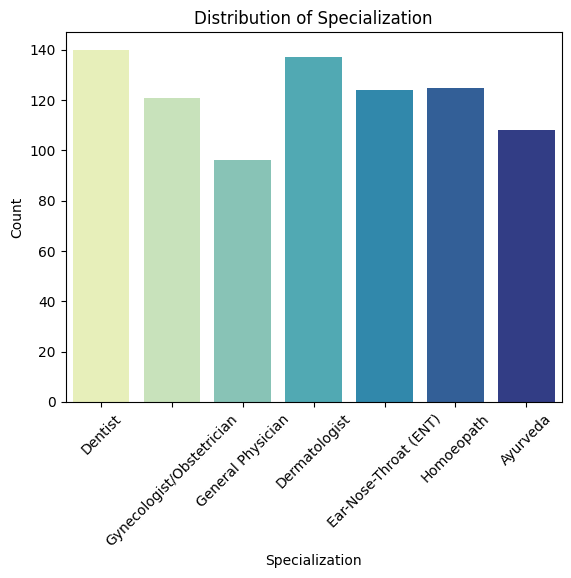

In [39]:
# Univariate bar plot for Specialization
sns.countplot(data=df1, x='Specialization', palette='YlGnBu')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Distribution of Specialization')
plt.xticks(rotation=45)
plt.show()

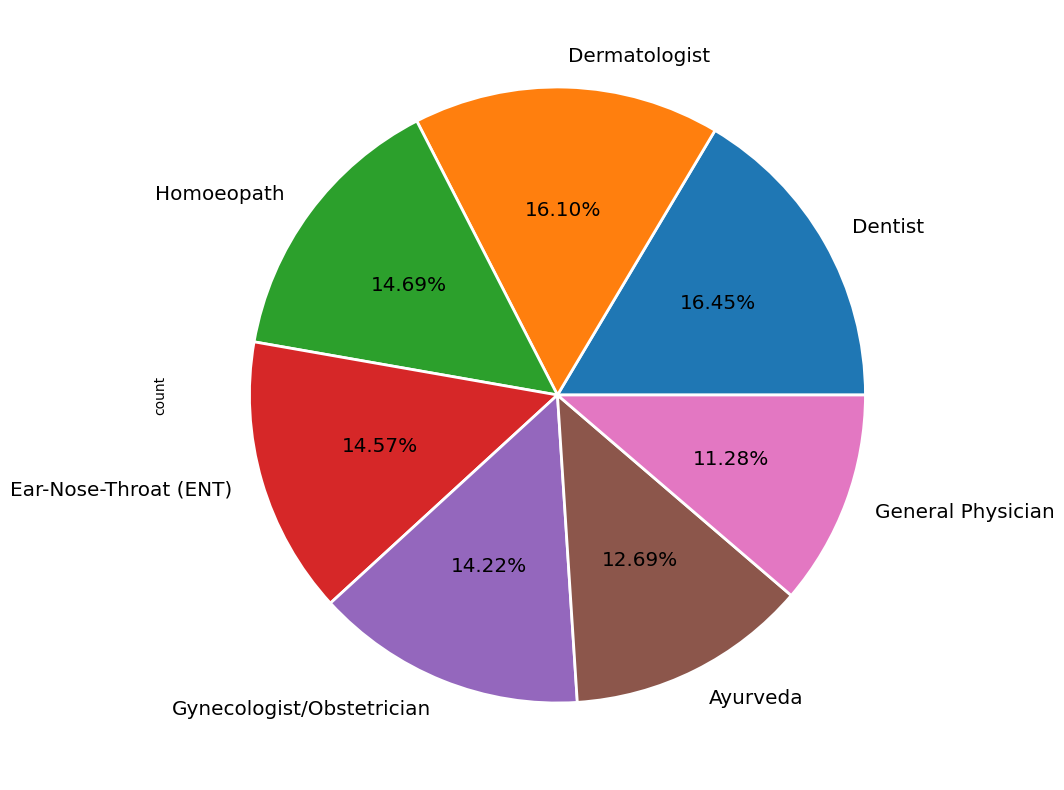

In [40]:
df1["Specialization"].value_counts().plot(kind="pie",autopct="%.2f%%",figsize=(10,10),wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})

plt.show()

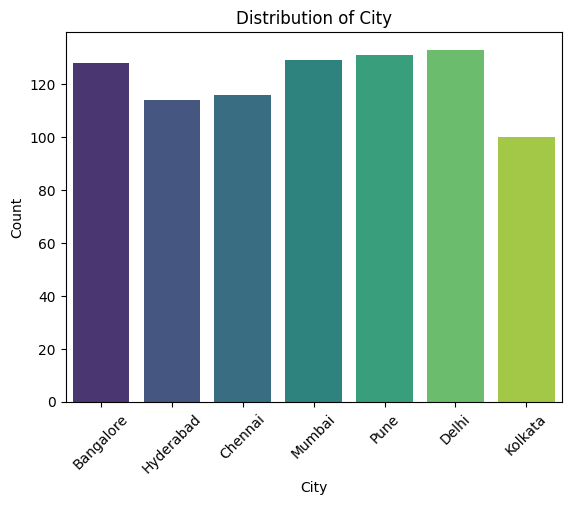

In [41]:
# Univariate bar plot for City
sns.countplot(data=df1, x='City', palette='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of City')
plt.xticks(rotation=45)
plt.show()

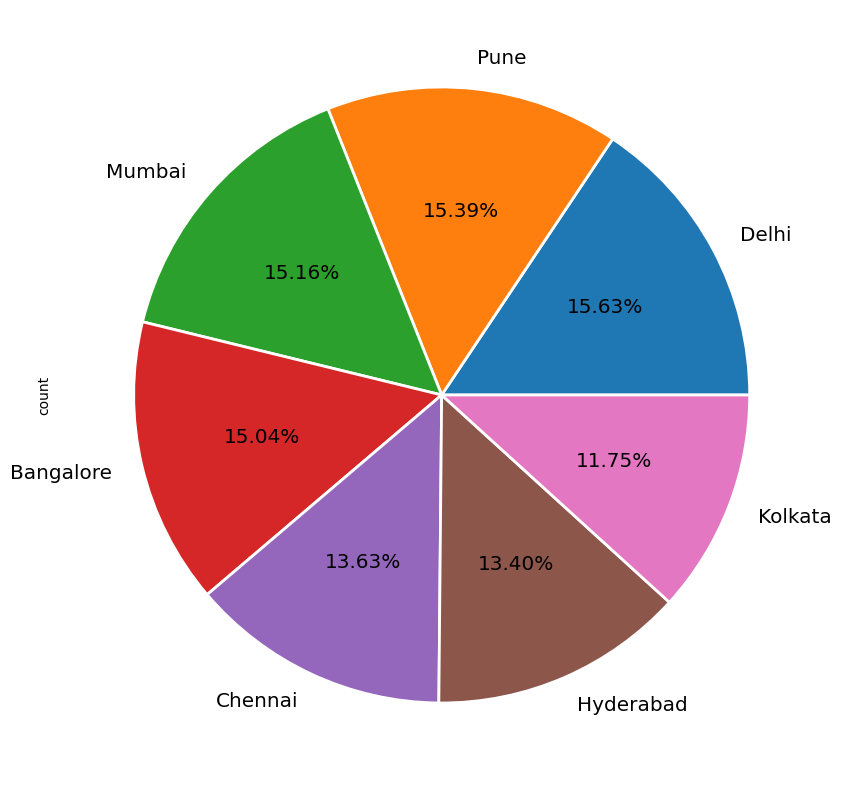

In [42]:
df1["City"].value_counts().plot(kind="pie",autopct="%.2f%%",figsize=(10,10),wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})

plt.show()

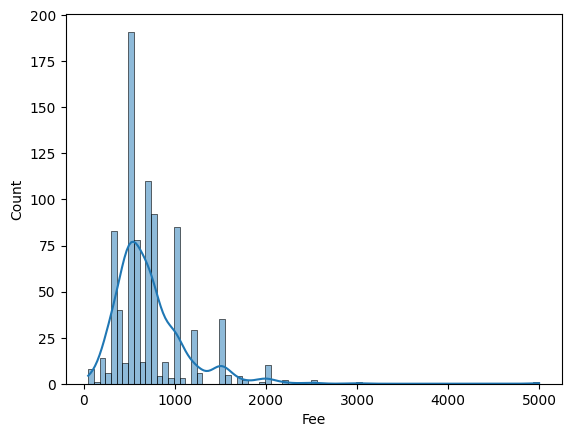

In [43]:
# Univariate Kernel Density Estimation (KDE) with histogram
sns.histplot(data=df1, x='Fee', kde=True, palette='viridis')
plt.show()

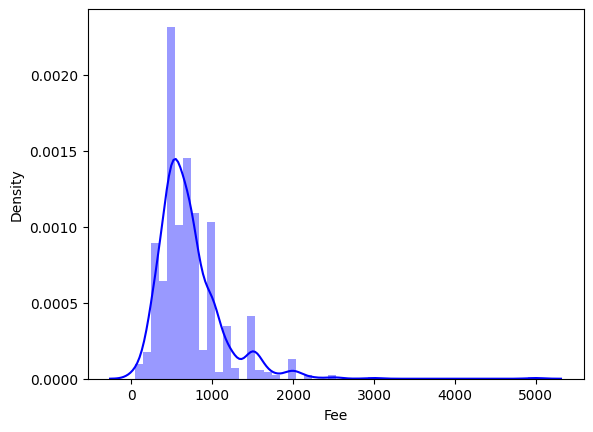

In [44]:
sns.distplot(df1['Fee'], color="blue")
plt.show()

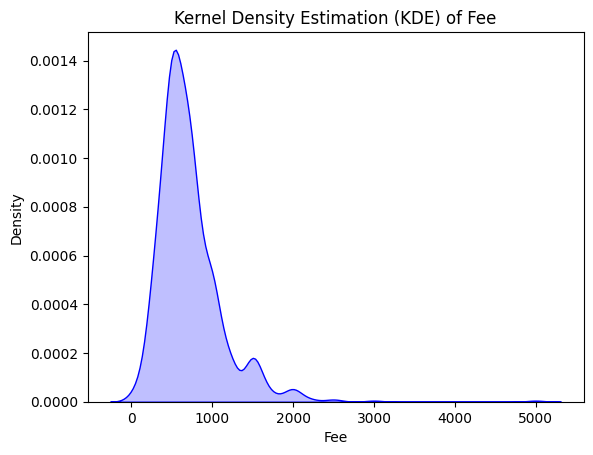

In [45]:
sns.kdeplot(data=df1['Fee'], shade=True, color='blue')
plt.xlabel('Fee')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) of Fee')
plt.show()

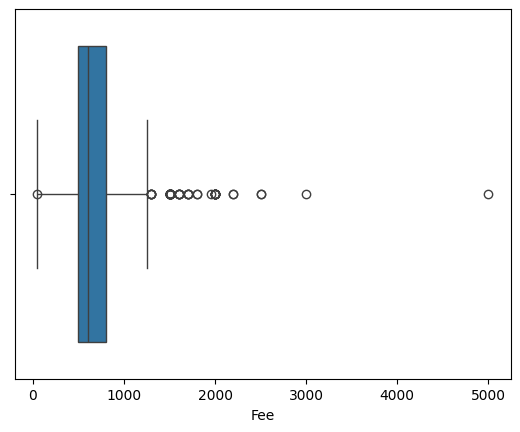

In [46]:
sns.boxplot(x = 'Fee',data=df1)

plt.show()

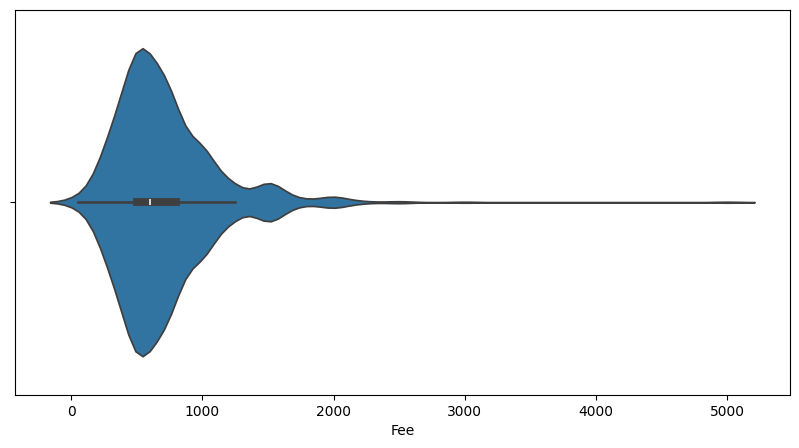

In [47]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Fee', data=df1)
plt.show()

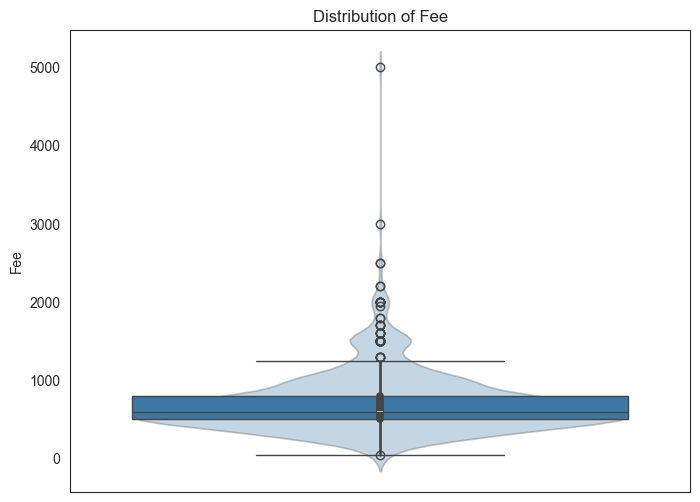

In [48]:
# Set the style to white for better contrast with the blue color
sns.set_style("white")

# Define a darker shade of blue
effective_blue = '#2C7BB6'  # You can adjust the hexadecimal color code as needed

# Box plot with violin plot overlay for Fee
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='Fee', color=effective_blue)  # Set box plot color to the effective blue
sns.violinplot(data=df1, y='Fee', color=effective_blue, alpha=0.3)  # Set violin plot color to the effective blue
plt.title('Distribution of Fee')
plt.ylabel('Fee')

# Remove the x-axis label since it's not necessary for this plot
plt.xlabel('')
plt.show()

<Axes: xlabel='Experience', ylabel='Density'>

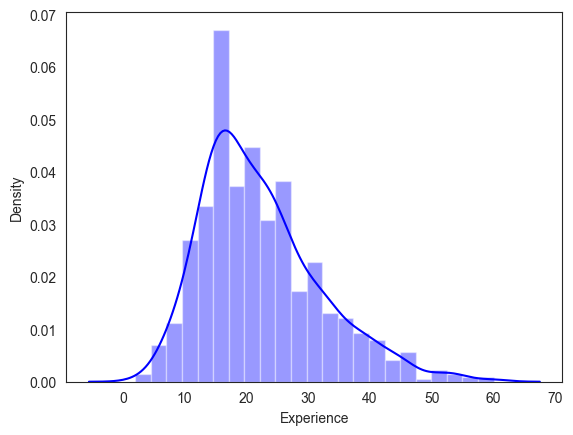

In [49]:
sns.distplot(df1["Experience"], color="blue")

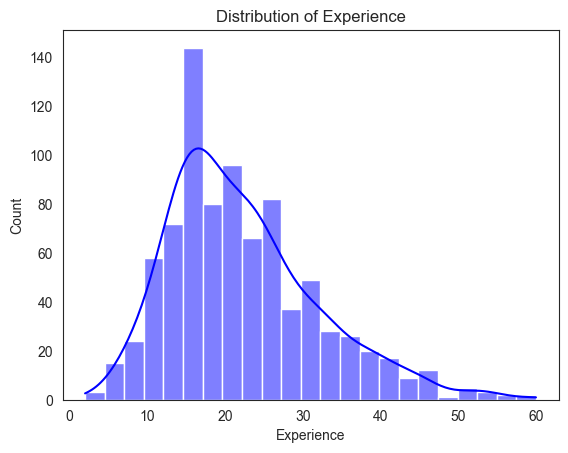

In [50]:
# Univariate KDE with histogram
sns.histplot(data=df1, x='Experience', kde=True, color='blue')
plt.xlabel('Experience')
plt.title('Distribution of Experience')
plt.show()

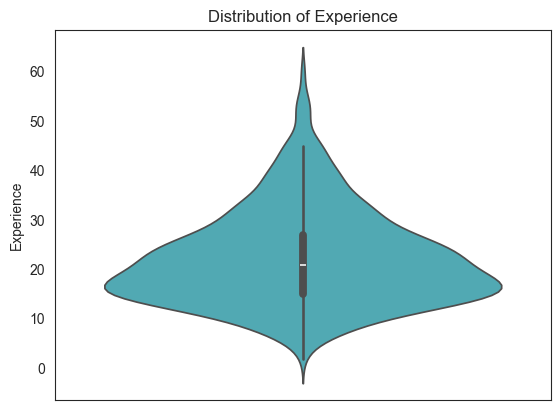

In [51]:
# Univariate violin plot for Experience
sns.violinplot(data=df1, y='Experience', palette='YlGnBu')
plt.ylabel('Experience')
plt.title('Distribution of Experience')
plt.show()

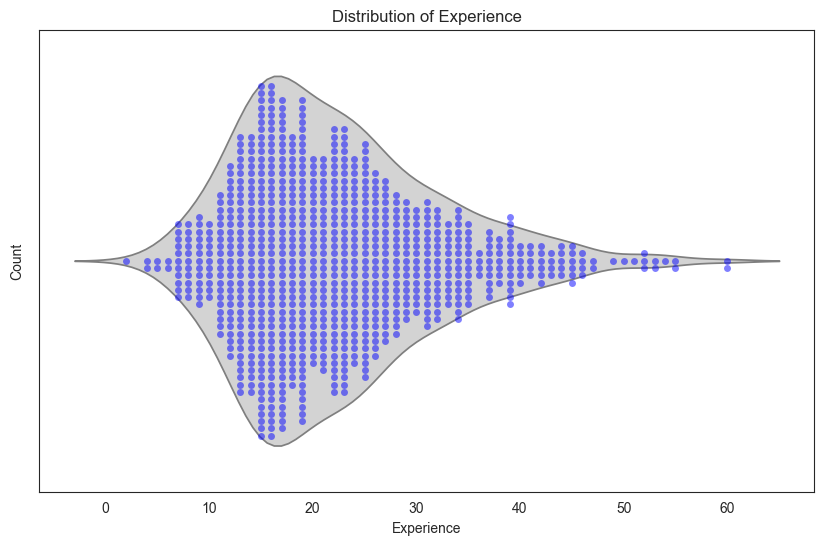

In [52]:
# Create a violin plot with swarm plot overlay for Experience
plt.figure(figsize=(10, 6))

sns.violinplot(data=df1, x='Experience', inner=None, color='lightgray')
sns.swarmplot(data=df1, x='Experience', color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Distribution of Experience')

plt.show()

<Axes: xlabel='Recommendation(%)', ylabel='Density'>

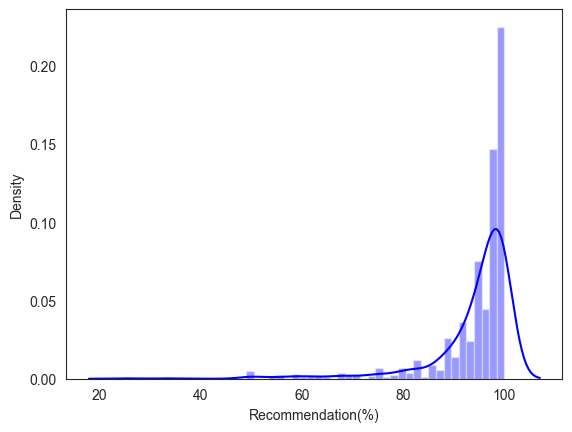

In [53]:
sns.distplot(df1["Recommendation(%)"], color="blue")

<Axes: xlabel='No_of_reviews', ylabel='Density'>

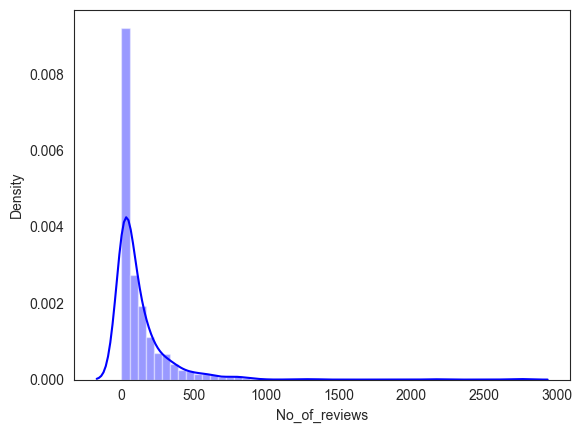

In [54]:
sns.distplot(df1["No_of_reviews"], color="blue")

# Bivariate Analysis

<Axes: xlabel='City'>

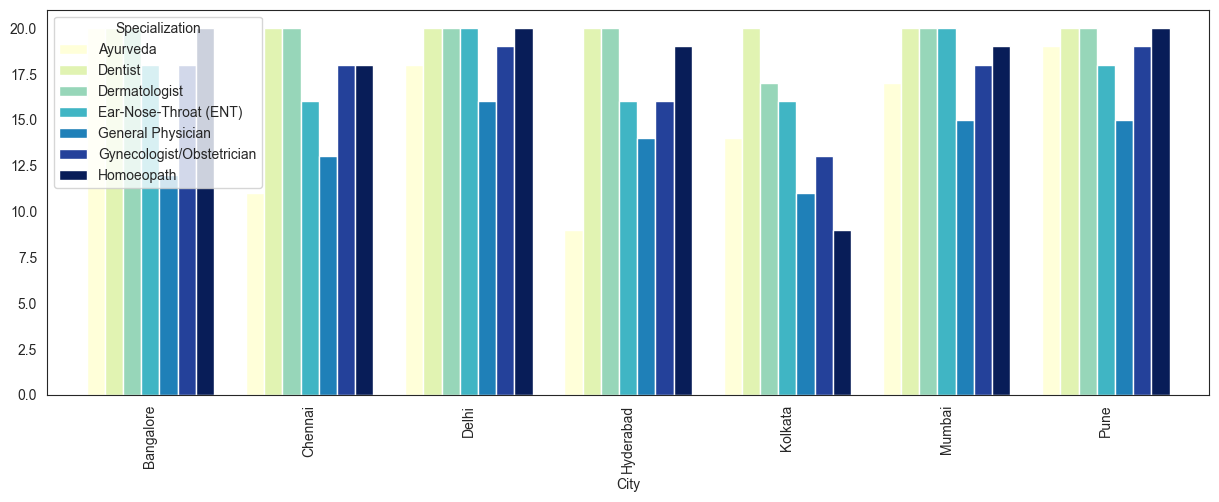

In [55]:
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(df1["City"],df1["Specialization"]).plot(kind="bar",ax=ax,width=0.8, legend = True, colormap = "YlGnBu")

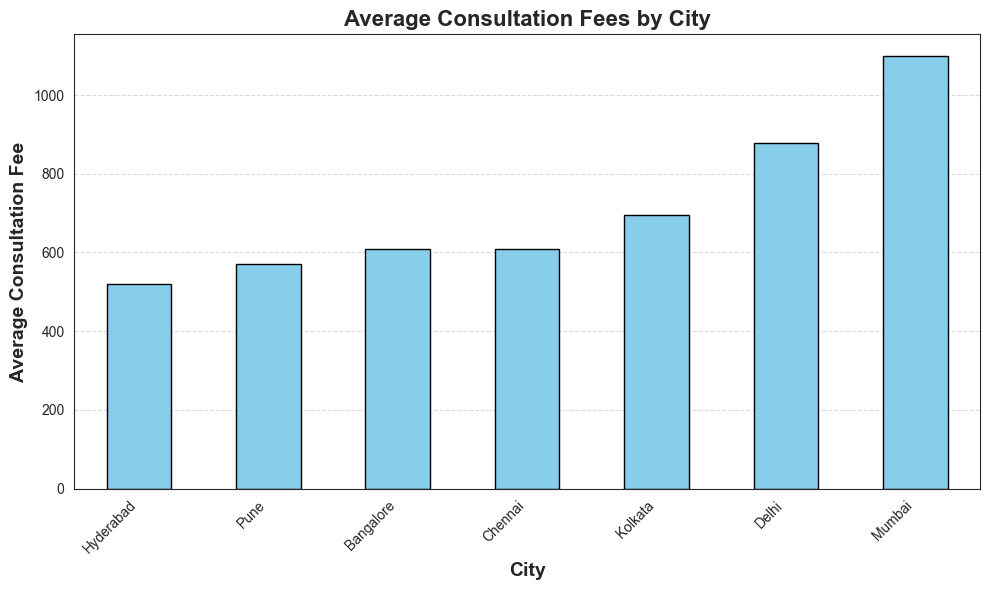

In [56]:
# Calculating average consultation fees by city
avg_consultation_fees = df1.groupby('City')['Fee'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_consultation_fees.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title('Average Consultation Fees by City', fontsize=16, fontweight='bold')  # Set title with custom font size and weight
plt.xlabel('City', fontsize=14, fontweight='bold')  # Set x-axis label with custom font size and weight
plt.ylabel('Average Consultation Fee', fontsize=14, fontweight='bold')  # Set y-axis label with custom font size and weight
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and set custom font size
plt.yticks(fontsize=10)  # Set custom font size for y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines with custom style and transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

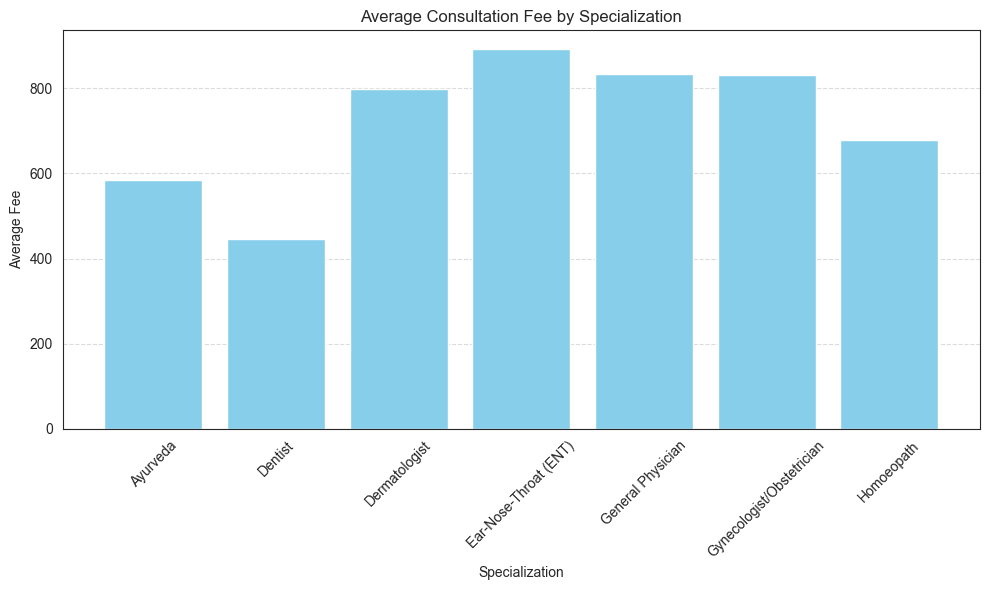

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(average_fee_by_Specialization['Specialization'], average_fee_by_Specialization['Fee'], color='skyblue')
plt.title('Average Consultation Fee by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Average Fee')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

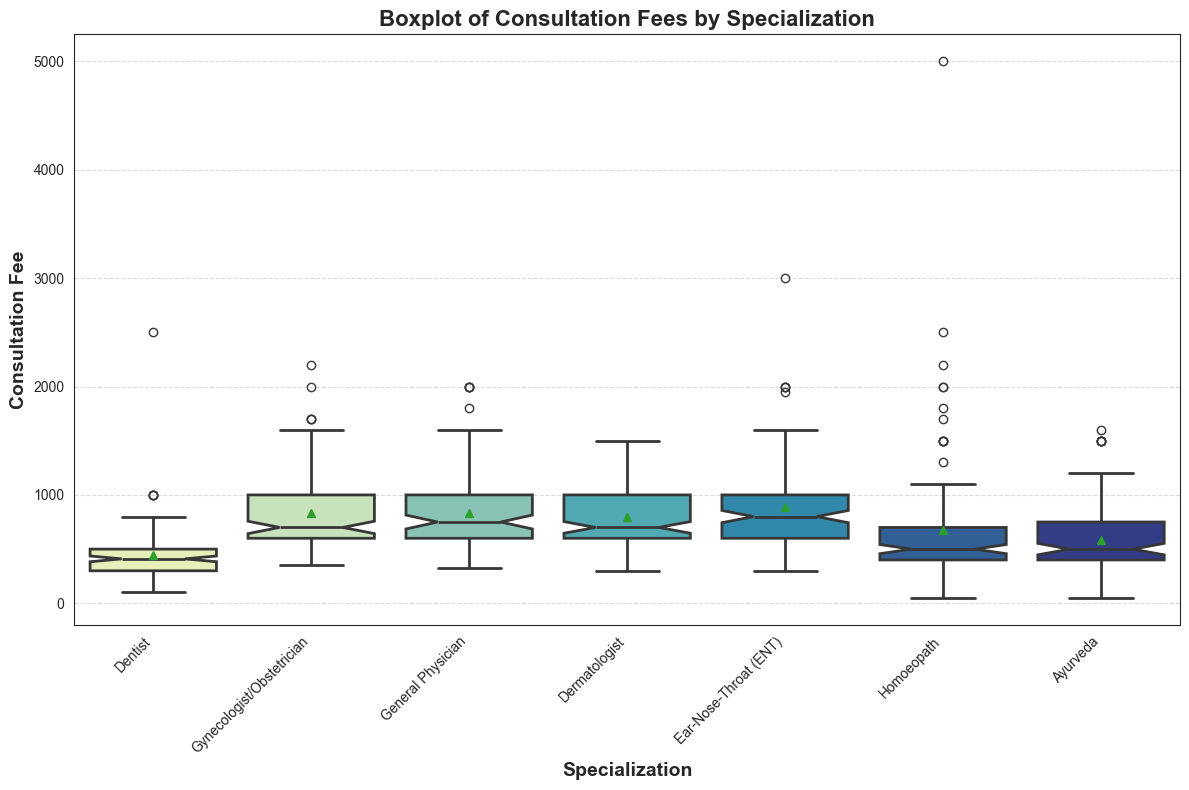

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Specialization', y='Fee', data=df1, palette='YlGnBu', linewidth=2, notch=True, showmeans=True)
plt.title('Boxplot of Consultation Fees by Specialization', fontsize=16, fontweight='bold')
plt.xlabel('Specialization', fontsize=14, fontweight='bold')
plt.ylabel('Consultation Fee', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

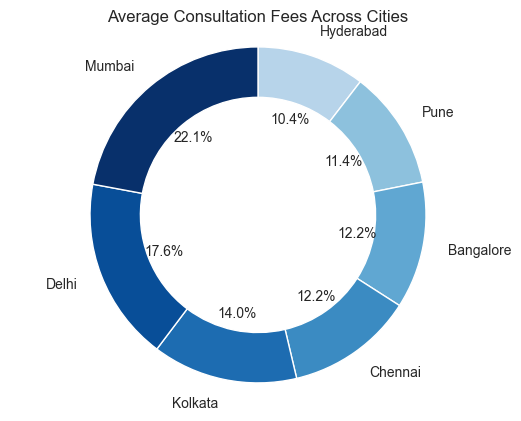

In [59]:
# Group the DataFrame by city
grouped_df = df1.groupby('City')['Fee'].mean().sort_values()

# Plotting
fig, ax = plt.subplots()
cmap = plt.cm.Blues  # Using predefined color map for shades of blue

# Plotting doughnut plot for average fees across cities
ax.pie(grouped_df, labels=grouped_df.index, colors=cmap(np.linspace(0.3, 1, len(grouped_df))), startangle=90, counterclock=False, wedgeprops=dict(width=0.3), autopct='%1.1f%%', labeldistance=1.15)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Average Consultation Fees Across Cities')
plt.show()


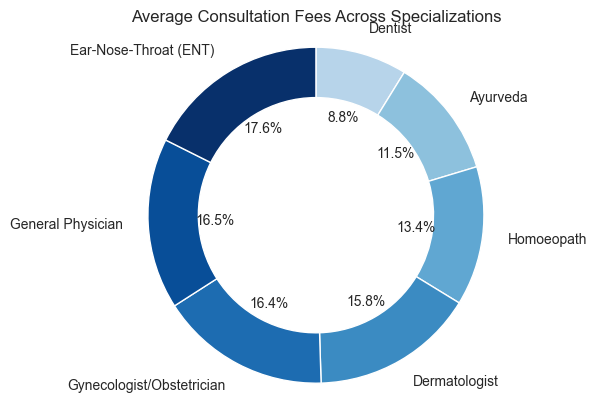

In [60]:
# Group the DataFrame by specialization
grouped_df = df1.groupby('Specialization')['Fee'].mean().sort_values()

# Plotting
fig, ax = plt.subplots()

# Generate colors from the Blues colormap
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.3, 1, len(grouped_df)))

# Plotting doughnut plot for fees across specializations
ax.pie(grouped_df, labels=grouped_df.index, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3), autopct='%1.1f%%', labeldistance=1.15)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Average Consultation Fees Across Specializations')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Dentist'),
  Text(1, 0, 'Gynecologist/Obstetrician'),
  Text(2, 0, 'General Physician'),
  Text(3, 0, 'Dermatologist'),
  Text(4, 0, 'Ear-Nose-Throat (ENT)'),
  Text(5, 0, 'Homoeopath'),
  Text(6, 0, 'Ayurveda')])

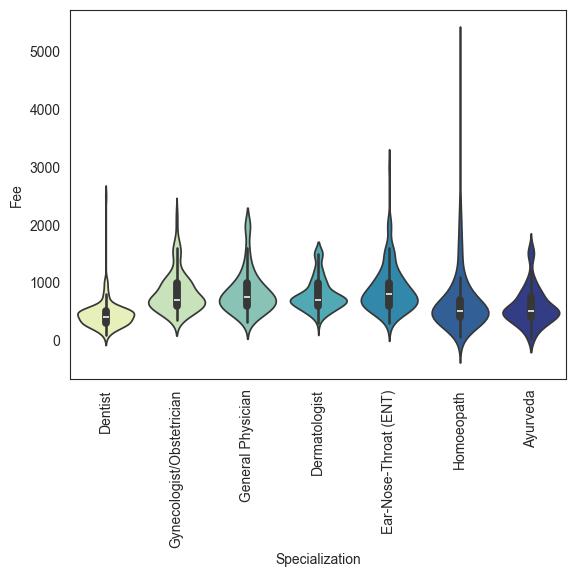

In [61]:
sns.violinplot(data=df1, x="Specialization", y="Fee", palette='YlGnBu')
plt.xticks(rotation=90)

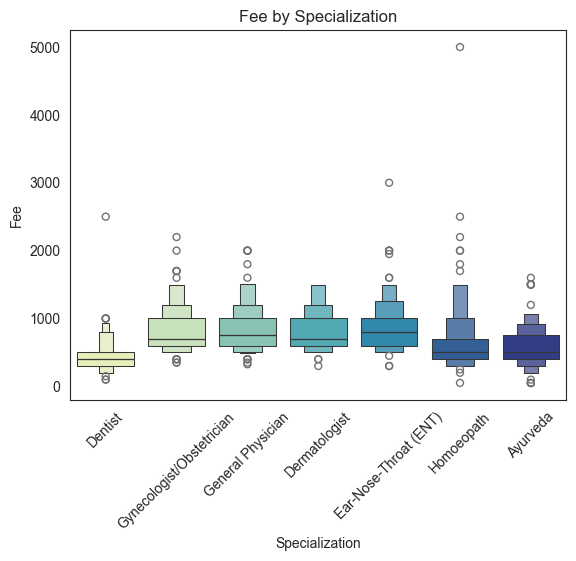

In [62]:
# Bivariate boxen plot for Fee vs. Specialization
sns.boxenplot(data=df1, x='Specialization', y='Fee', palette='YlGnBu')
plt.xlabel('Specialization')
plt.ylabel('Fee')
plt.title('Fee by Specialization')
plt.xticks(rotation=45)
plt.show()

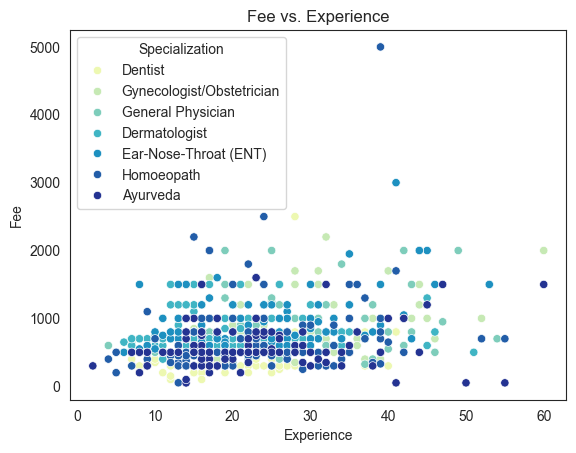

In [63]:
# Bivariate scatter plot with hue for Fee vs. Experience colored by Specialization
sns.scatterplot(data=df1, x='Experience', y='Fee', hue='Specialization', palette='YlGnBu')
plt.xlabel('Experience')
plt.ylabel('Fee')
plt.title('Fee vs. Experience')
plt.show()

<Axes: xlabel='Fee', ylabel='Recommendation(%)'>

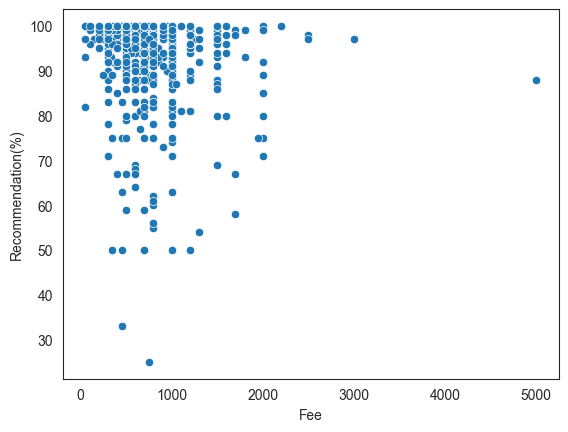

In [64]:
sns.scatterplot(x = "Fee", y = "Recommendation(%)" , data = df1, palette= "YlGnBu")

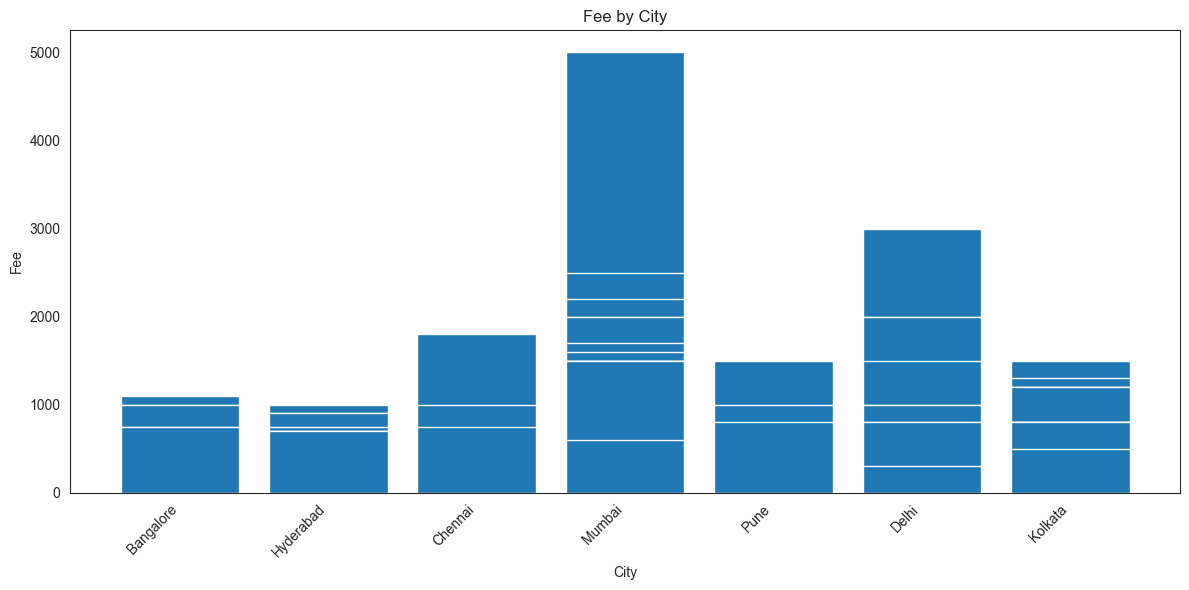

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(df1['City'], df1['Fee'])
plt.xlabel('City')
plt.ylabel('Fee')
plt.title('Fee by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

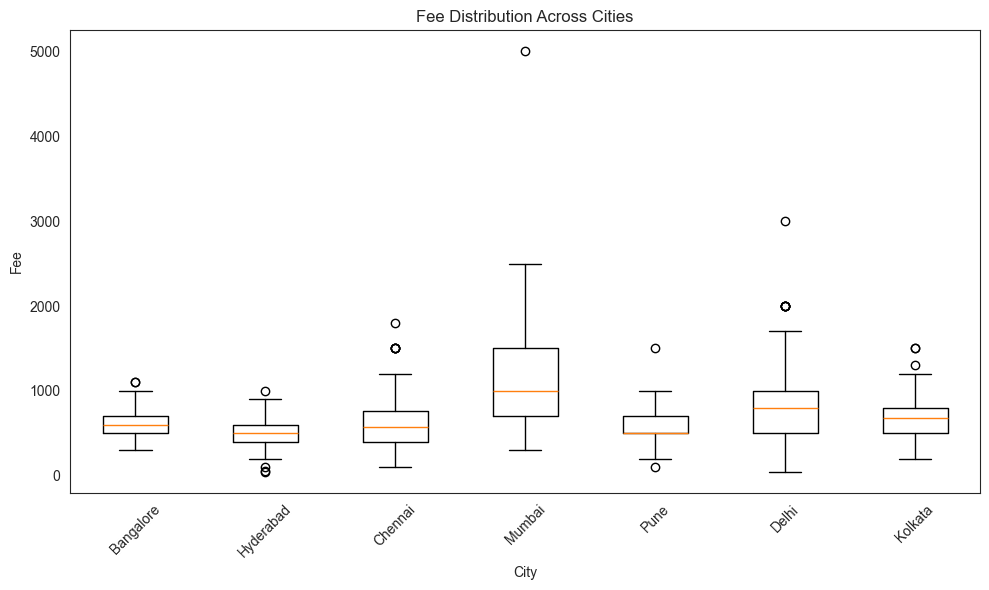

In [66]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df1[df1['City'] == city]['Fee'] for city in df1['City'].unique()], labels=df1['City'].unique())
plt.xlabel('City')
plt.ylabel('Fee')
plt.title('Fee Distribution Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

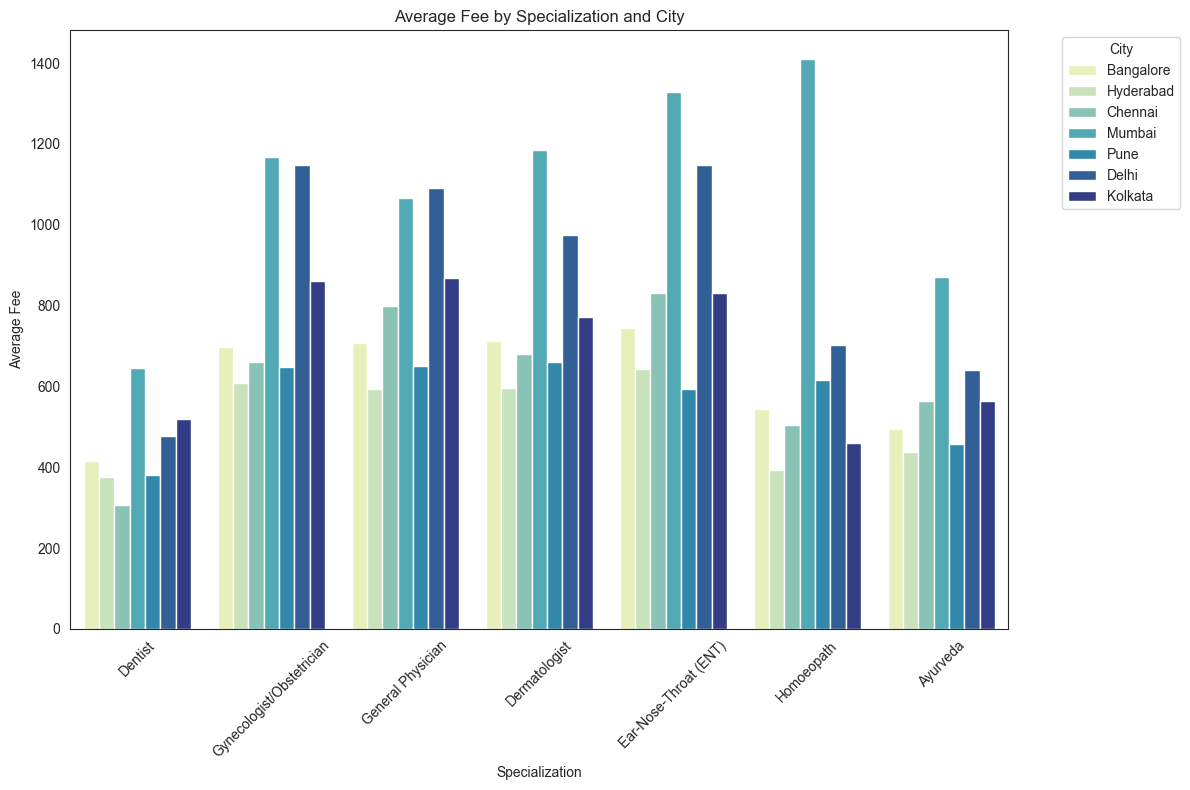

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df1, x='Specialization', y='Fee', hue='City', estimator='mean', palette='YlGnBu', ci =False)
plt.title('Average Fee by Specialization and City')
plt.xlabel('Specialization')
plt.ylabel('Average Fee')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

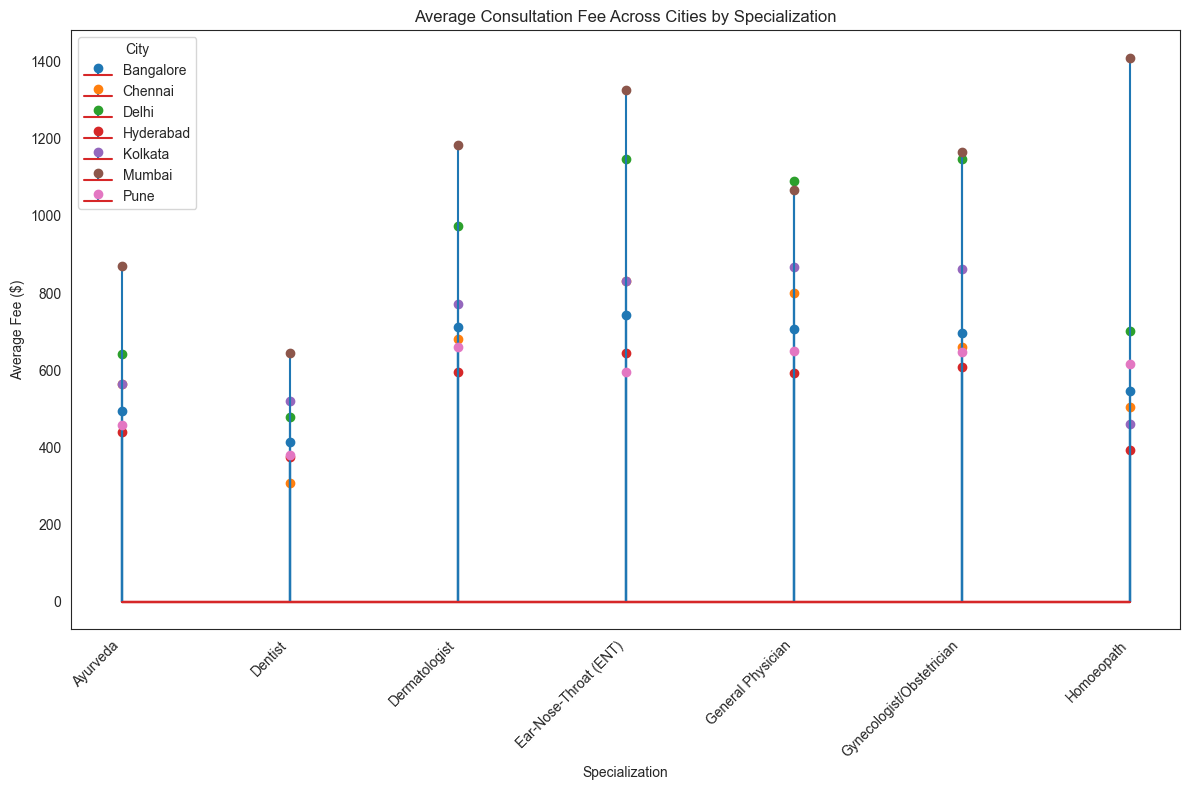

In [68]:
# Grouping by 'Specialization' and 'City' and calculating the average consultation fee
average_fee = df1.groupby(['Specialization', 'City'])['Fee'].mean().reset_index()

# Sorting the DataFrame by specialization for better visualization
average_fee_sorted = average_fee.sort_values(by='Specialization')

# Creating a stem plot
fig, ax = plt.subplots(figsize=(12, 8))

for city, data in average_fee_sorted.groupby('City'):
    ax.stem(data['Specialization'], data['Fee'], linefmt='-', markerfmt='o', label=city)

# Setting labels and title
ax.set_xlabel('Specialization')
ax.set_ylabel('Average Fee ($)')
ax.set_title('Average Consultation Fee Across Cities by Specialization')

# Adding legend
ax.legend(title='City')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

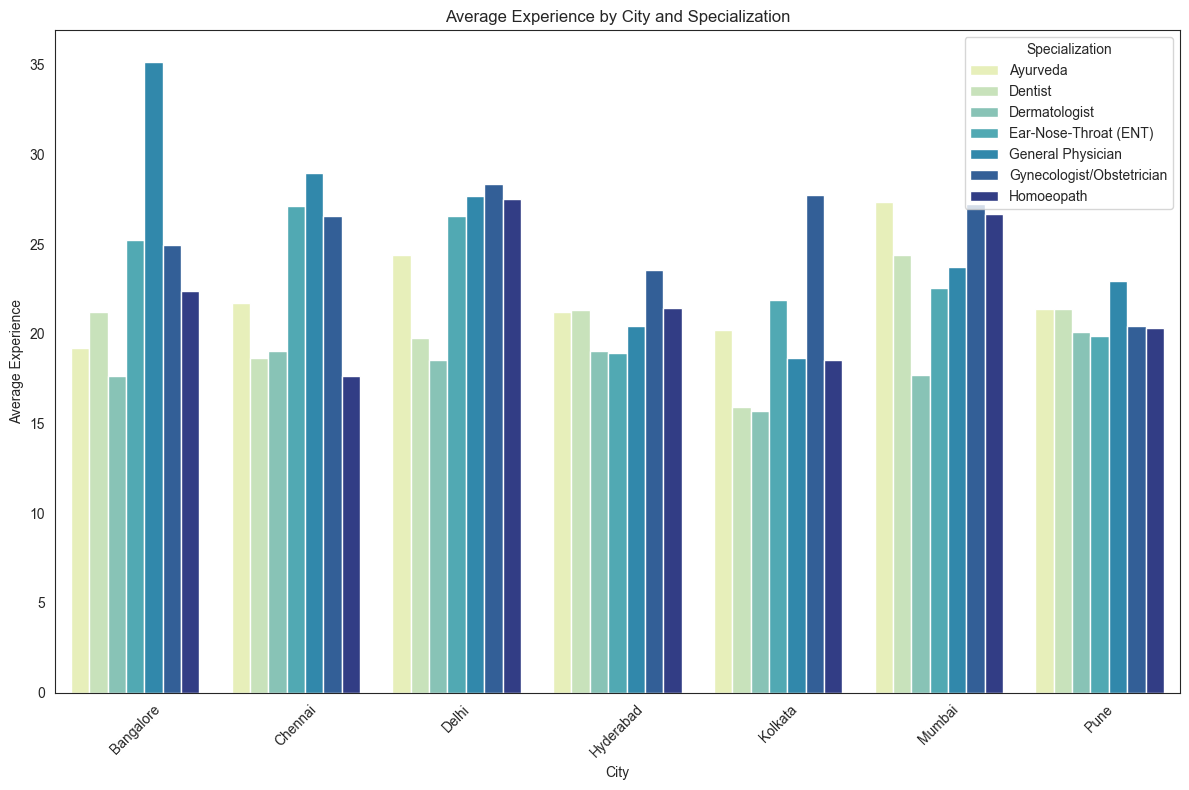

In [70]:
avg_experience = df1.groupby(['City', 'Specialization'])['Experience'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_experience, x='City', y='Experience', hue='Specialization', palette='YlGnBu')
plt.xlabel('City')
plt.ylabel('Average Experience')
plt.title('Average Experience by City and Specialization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

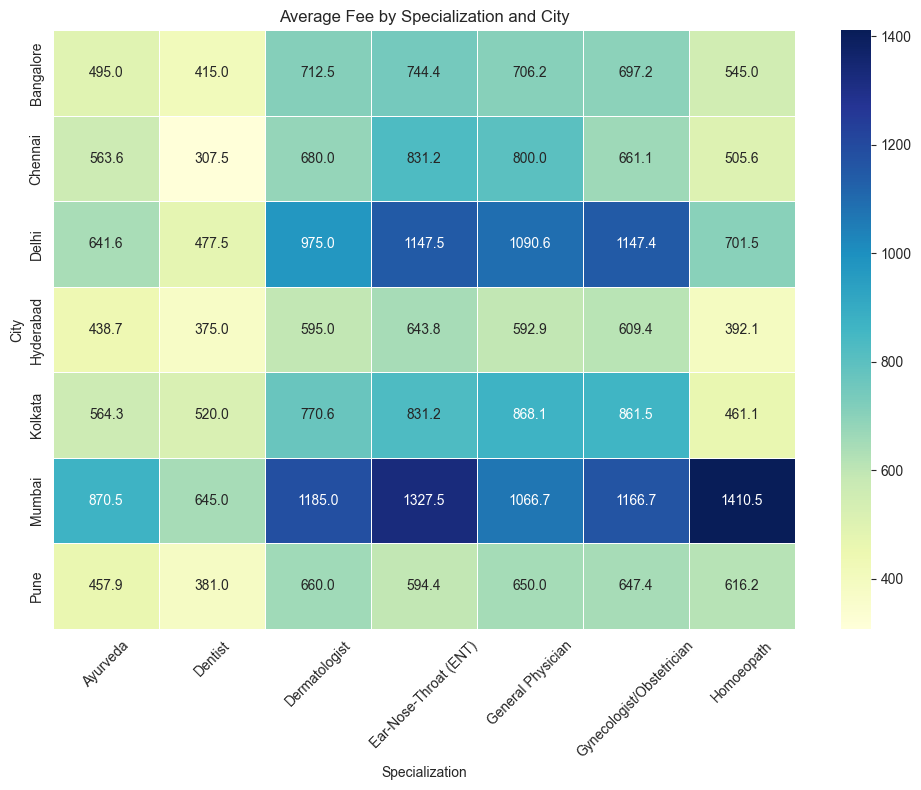

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_1, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Fee by Specialization and City')
plt.xlabel('Specialization')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

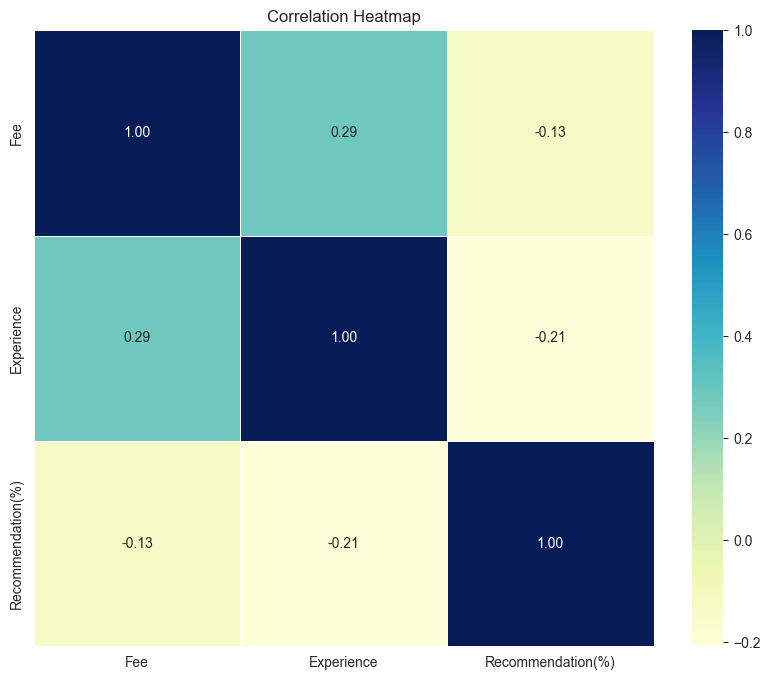

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation Matrix:

The correlation matrix shows the correlation coefficients between numerical variables. For example:

There is a weak positive correlation (0.285) between experience and fee, indicating that doctors with more experience tend to have slightly higher fees.

There is a weak negative correlation (-0.207) between experience and recommendation percentage, suggesting that doctors with more experience may have slightly lower recommendation percentages.

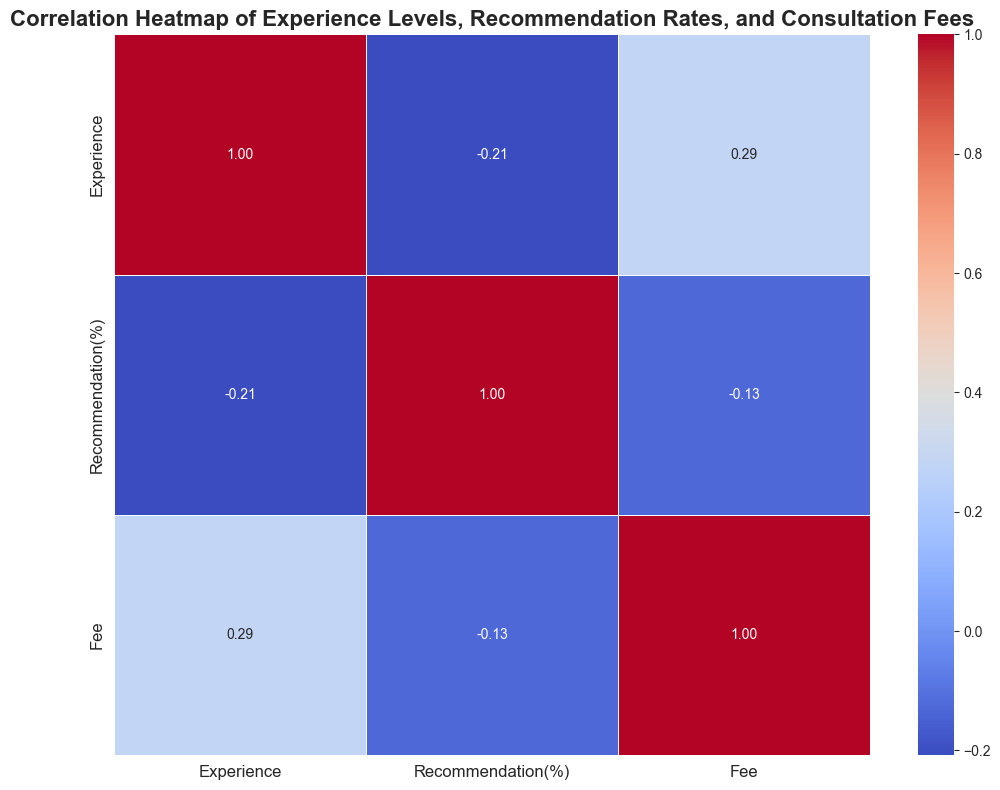

In [73]:
selected_columns = ['Experience', 'Recommendation(%)', 'Fee']
correlation_df = df1[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Experience Levels, Recommendation Rates, and Consultation Fees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

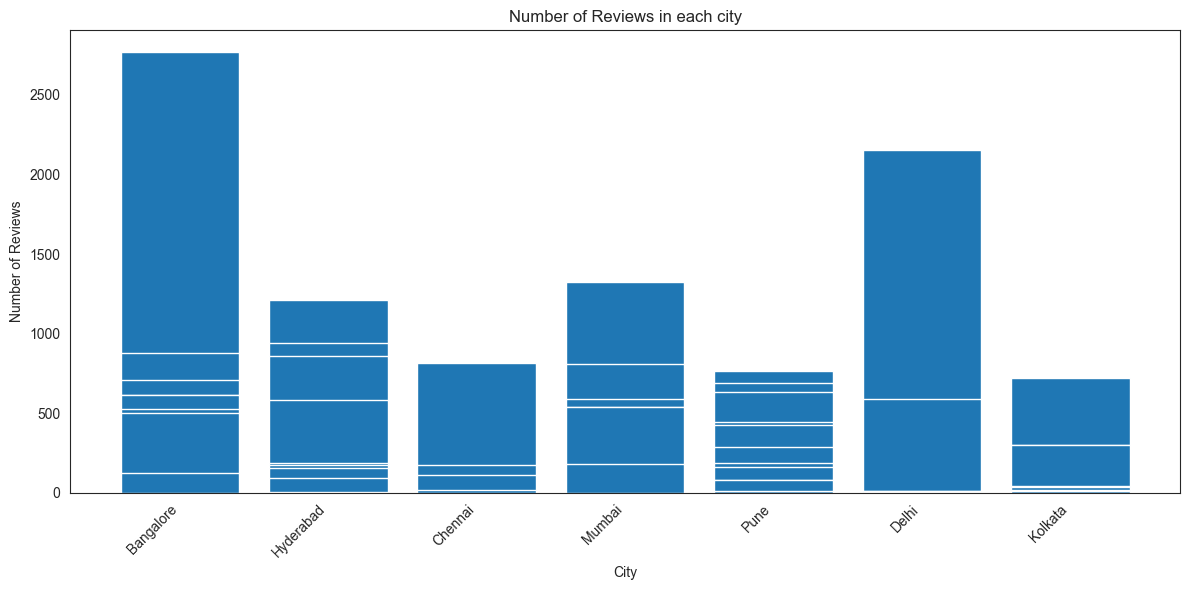

In [74]:
# Plotting a bar chart for the number of reviews for each doctor
plt.figure(figsize=(12, 6))
plt.bar(df1['City'], df1['No_of_reviews'])
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in each city')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

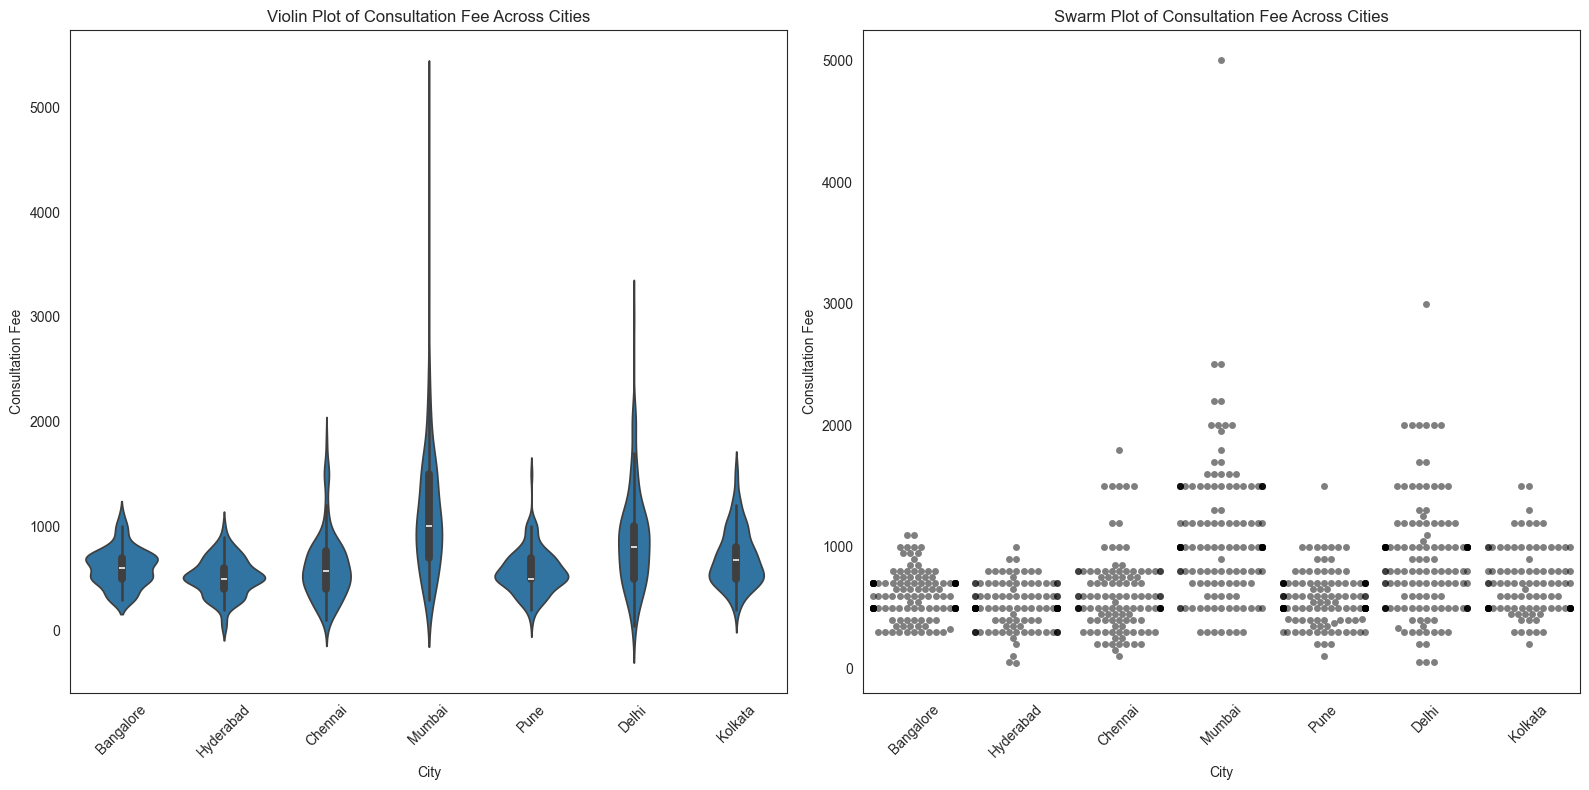

In [75]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Create a violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x='City', y='Fee', data=df1)
plt.title('Violin Plot of Consultation Fee Across Cities')
plt.xlabel('City')
plt.ylabel('Consultation Fee')
plt.xticks(rotation=45)

# Create a swarm plot
plt.subplot(1, 2, 2)
sns.swarmplot(x='City', y='Fee', data=df1, color='black', alpha=0.5)
plt.title('Swarm Plot of Consultation Fee Across Cities')
plt.xlabel('City')
plt.ylabel('Consultation Fee')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [76]:
# Statistical summary of the 'Fee' column
summary = df1['Fee'].describe()

# Define fee categories based on statistical summary
bins = [summary['min'], 500, 600, 800, summary['max']]  # Adjust bins as needed
labels = ['{}-{}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)]

# Group the DataFrame by City, Specialization, and fee category and calculate the average fee for each group
df1['Fee Category'] = pd.cut(df1['Fee'], bins=bins, labels=labels, right=False)
grouped_df = df1.groupby(['City', 'Specialization', 'Fee Category'])['Fee'].mean().reset_index(name='Average Fee')
grouped_df['Count'] = df1.groupby(['City', 'Specialization', 'Fee Category']).size().values

# Create a sunburst plot
fig = px.sunburst(grouped_df, path=['City', 'Specialization', 'Fee Category'], values='Count', title='Distribution of Doctor Specializations Across Cities by Fee Category',
                  hover_data={'Average Fee': True, 'Count': True})  # Include Average Fee and Count in hover data
fig.write_html("fee.html")
fig.show()

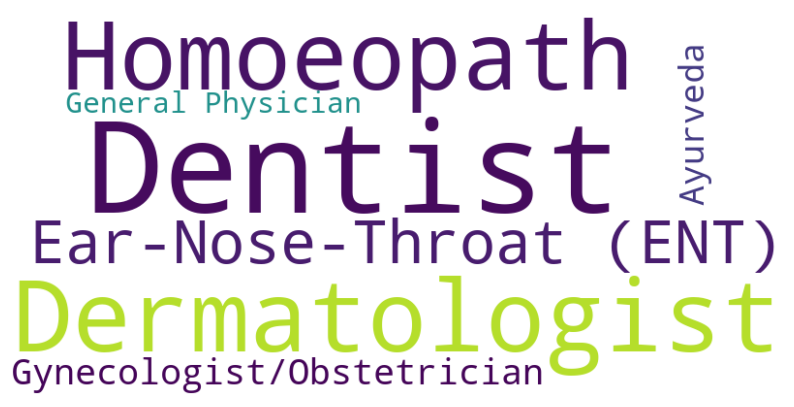

In [77]:
from wordcloud import WordCloud, STOPWORDS
# Extract the "Specialization" column
specializations = df1['Specialization']

# Generate word frequencies
word_freq = specializations.value_counts().to_dict()

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

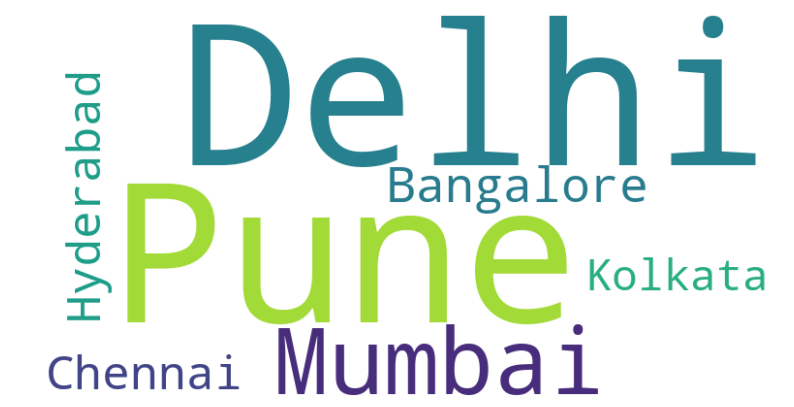

In [78]:
# Extract the "City" column
cities = df1['City']

# Generate word frequencies for cities
city_freq = cities.value_counts().to_dict()

# Create WordCloud object for cities
city_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(city_freq)

# Plot City WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(city_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


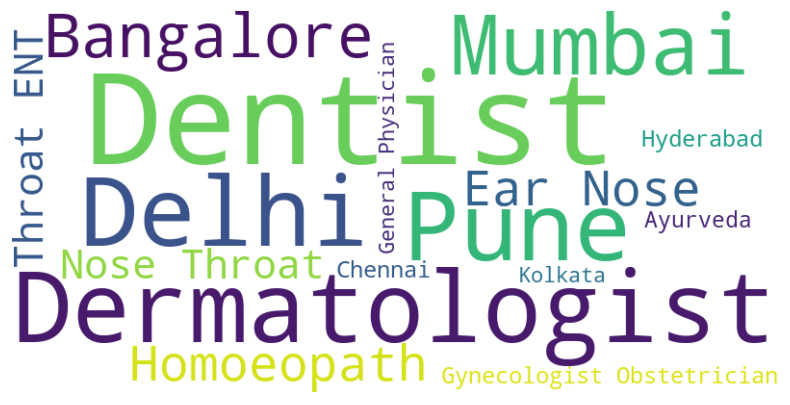

In [79]:
# Assuming df1 is your DataFrame containing the 'City' and 'Specialization' columns
text = ' '.join(df1['City'].astype(str) + ' ' + df1['Specialization'].astype(str))

# Create WordCloud object
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

# Generate the word cloud
wordcloud = wc.generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

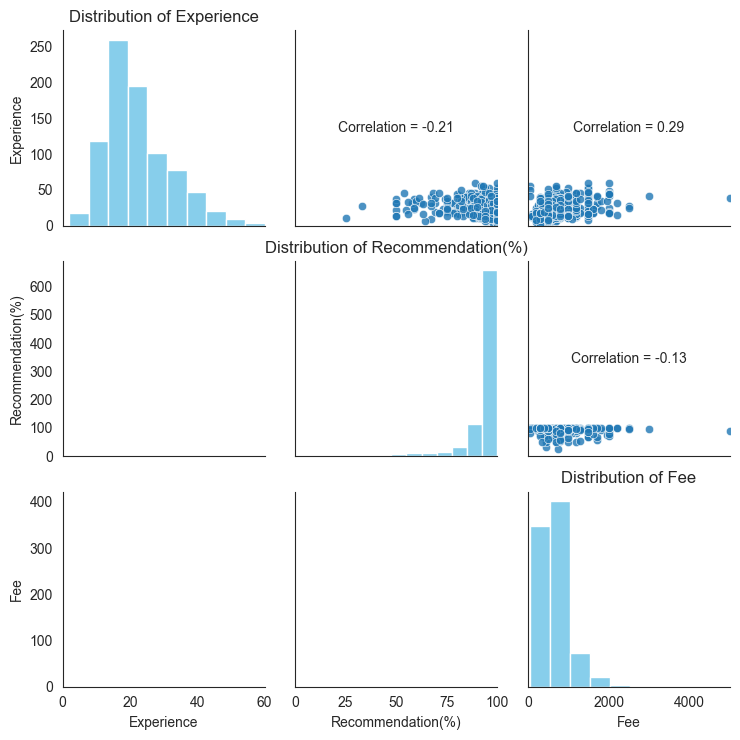

In [80]:
selected_columns = ['Experience', 'Recommendation(%)', 'Fee']
correlation_df = df1[selected_columns]

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Create a PairGrid
g = sns.PairGrid(correlation_df)

# Scatter plots in the upper triangle
g.map_upper(sns.scatterplot, alpha=0.8)

# Correlation values in the lower triangle
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    ax = g.axes[j, i]
    ax.text(0.5, 0.5, f'Correlation = {corr_matrix.iloc[j, i]:.2f}', ha='center', va='center', fontsize=10, transform=ax.transAxes)

# Customizing the diagonal
for i, col in enumerate(selected_columns):
    g.axes[i, i].hist(correlation_df[col], color='skyblue')
    g.axes[i, i].set_title(f'Distribution of {col}')
    g.axes[i, i].set_xlim(0, correlation_df[col].max())

plt.tight_layout()
plt.show()

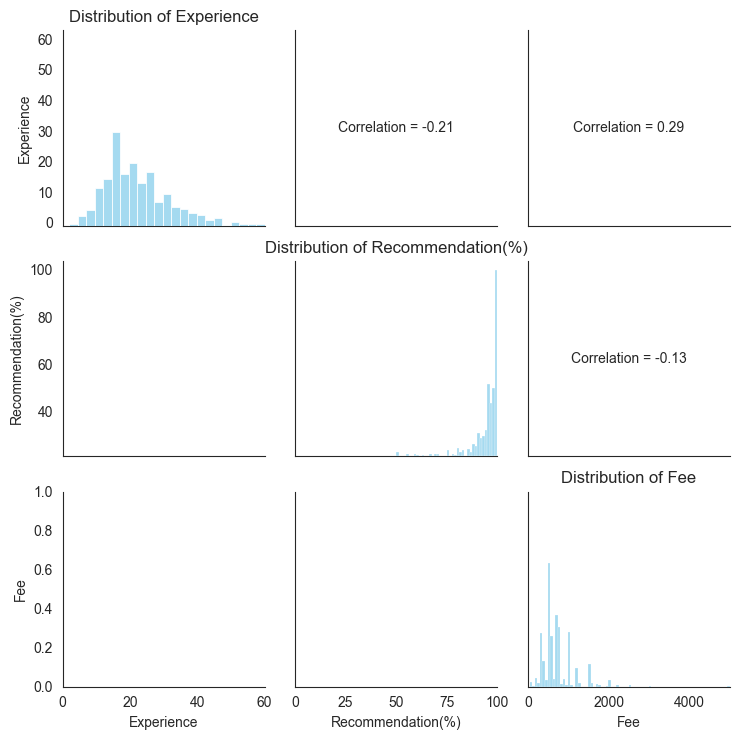

In [81]:
selected_columns = ['Experience', 'Recommendation(%)', 'Fee']
correlation_df = df1[selected_columns]

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Create a PairGrid
g = sns.PairGrid(correlation_df)

# Scatter plots in the upper triangle
g.map_upper(sns.scatterplot, alpha=0.8)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=False, color='skyblue')

# Correlation values in the lower triangle
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    g.axes[j, i].cla()
    g.axes[j, i].text(0.5, 0.5, f'Correlation = {corr_matrix.iloc[j, i]:.2f}', ha='center', va='center', fontsize=10, transform=g.axes[j, i].transAxes)

# Customizing the diagonal
for i, col in enumerate(selected_columns):
    g.axes[i, i].set_title('Distribution of {}'.format(col))
    g.axes[i, i].set_xlim(0, correlation_df[col].max())

plt.tight_layout()
plt.show()


TypeError: heatmap() missing 1 required positional argument: 'data'

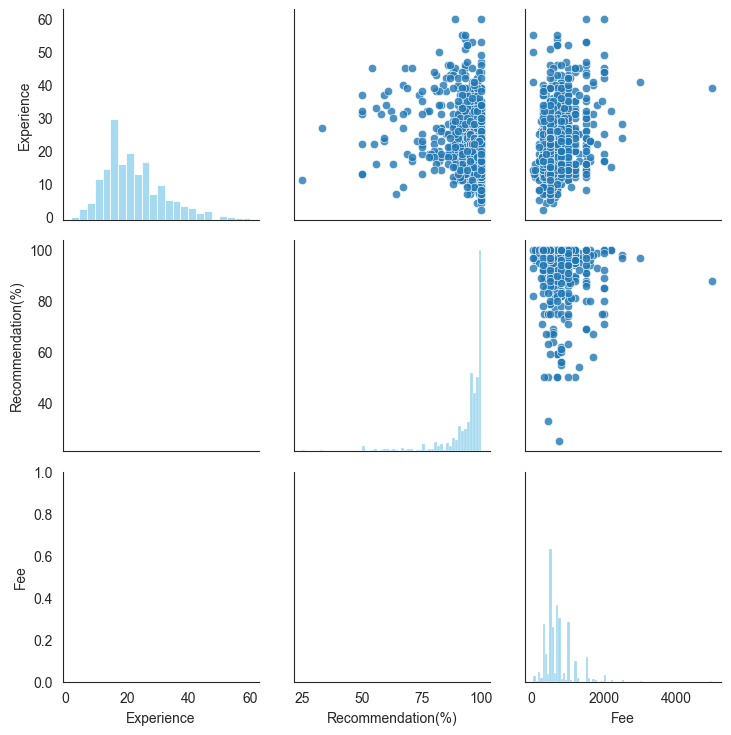

In [82]:
selected_columns = ['Experience', 'Recommendation(%)', 'Fee']
correlation_df = df1[selected_columns]

# Create a PairGrid
g = sns.PairGrid(correlation_df)
g.map_upper(sns.scatterplot, alpha=0.8)  # Scatter plots in the upper triangle
g.map_diag(sns.histplot, kde=False, color='skyblue')  # Histograms on the diagonal
g.map_lower(sns.heatmap, annot=True, cmap='coolwarm', fmt=".2f")  # Correlation heatmap in the lower triangle

# Customizing the diagonal
for i, col in enumerate(selected_columns):
    g.axes[i, i].set_title('Distribution of {}'.format(col))
    g.axes[i, i].set_xlim(0, correlation_df[col].max())

plt.tight_layout()
plt.show()